# Introducción

El trabajo se divide en tres grandes partes bien diferenciadas. Al ser tres integrantes, cada miembro se ha encargado principalmente de una de ellas, aunque todos hemos participado en el conjunto total del trabajo.
- Preparación y Análisis de datos - Javier García González ----- 100536188
- Modelos de Regresión utilizados - Guillermo Grande Santi ----- 100532462
- Modelos de Clasificación utilizados - Jesús Martín Trilla ----- 100536236

En las siguientes secciones se encontrará información anexada al código para explicar las distintas técnicas implementadas y su justificación, además de distintas pruebas, y conclusiones para regresión y clasificación.

# Preparación y Análisis de datos

Antes de abordar los problemas de clasificación y regresión, primero es esencial explorar y comprender las características de los datos. Este análisis inicial nos permite evaluar si es necesario aplicar transformaciones específicas. Dichas transformaciones podrían incluir, entre otras, la normalización, estandarización, imputación de datos faltantes o eliminación de variables redundantes. Al realizar esta exploración, optimizamos la preparación del conjunto de datos para los modelos de clasificación y regresión, asegurando así un análisis más coherente y efectivo.

#### Carga de librerias

A lo largo del trabajo emplearemos la librería Pandas, para la manipulación de los datos. Además, para todo lo relacionado con los modelos de regresión y clasificación, usaremos la librería scikit-learn. Por último, para la visualización de datos, usaremos Matplotlib y Seaborn.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTENC
import numpy as np
import matplotlib as mpl
from matplotlib import cm


%matplotlib inline
plt.style.use('bmh')

#### Carga de datos

Cargamos los datos usando dataframe de Pandas.

In [4]:
df = pd.read_csv('../data/EstudioCrediticio_TrainP.csv')

### Primera visualización de los datos

In [ ]:
df.shape

(50000, 36)

El conjunto de datos en cuestión contiene 50,000 filas con 36 atributos, cada uno representando distintas características del perfil de los clientes. El objetivo principal es utilizar estos atributos para ayudar al banco en la toma de decisiones respecto a la concesión de préstamos. Esto implica dos posibles aplicaciones:
* **Clasificación**: Decidir si se concede o se deniega un préstamo, minimizando el riesgo de impago.
* **Regresión**: Estimar el nivel de riesgo asociado a una operación de préstamo en términos cuantitativos.

Para comprender mejor el tipo de información contenida en los atributos y realizar un análisis preliminar, conviene examinar rápidamente las primeras y últimas columnas del conjunto de datos. Esto nos permitirá observar la naturaleza de los datos (numéricos, categóricos, etc.) y, en función de ello, decidir si son necesarias transformaciones o preprocesamiento adicional para optimizar los modelos de clasificación y regresión que se aplicarán posteriormente.

In [ ]:
df.head()

Id  Edad  IngresoBrutoAnual  ScoreCrediticio             SituacionLaboral  \
0   1    44              22119            613.0  Empleado/a por cuenta ajena   
1   2    26              28874            582.0  Empleado/a por cuenta ajena   
2   3    38              84154            507.0  Empleado/a por cuenta ajena   
3   4    51              29464            504.0                   Autónomo/a   
4   5    39              20646            542.0  Empleado/a por cuenta ajena   

        NivelEducativo  Experiencia  CuantiaCredito  DuracionCredito  \
0                   FP         20.0           16154               60   
1         Bachillerato          0.0           11800               24   
2  Grado universitario         17.0            9257               36   
3                   FP         25.0            5495               36   
4  Grado universitario         16.0           14824               60   

    EstadoCivil  ...  IngresoBrutoMensual HistoricoPagosSuministros  \
0  Divorciado/a  ...          1843.250000                  0.771340   
1  Divorciado/a  ...          2406.166667                       NaN   
2  Divorciado/a  ...          7012.833333                  0.881874   
3  Divorciado/a  ...          2455.333333                  0.797217   
4     Soltero/a  ...          1720.500000                  0.714030   

   EstabilidadLaboral  PatrimonioNeto  TipoInteresBase  TipoInteres  \
0                   2           28390         0.179654     0.171628   
1                   6          115113         0.160800     0.172783   
2                   4           41268         0.205757     0.217175   
3                   5            1927         0.203495     0.197683   
4                   3           10011         0.213824     0.212976   

   PagoMensualCredito  RatioTotalDeudaIngresos CreditoAprobado  ScoreRiesgo  
0          402.883608                 0.483322               0         50.0  
1          584.997790                 0.541524               0         54.0  
2          352.177802                 0.074460               1         42.4  
3          203.565671                 0.246633               1         45.6  
4          403.524570                 0.375196               0         61.0  

[5 rows x 36 columns]

In [ ]:
df.tail()

Id  Edad  IngresoBrutoAnual  ScoreCrediticio  \
49995  49996    40              29951            600.0   
49996  49997    31              31974            466.0   
49997  49998    55              68679            611.0   
49998  49999    36              23501            599.0   
49999  50000    24              31136            580.0   

                  SituacionLaboral NivelEducativo  Experiencia  \
49995  Empleado/a por cuenta ajena             FP         18.0   
49996  Empleado/a por cuenta ajena      Doctorado          NaN   
49997  Empleado/a por cuenta ajena   Bachillerato         31.0   
49998  Empleado/a por cuenta ajena   Bachillerato         11.0   
49999  Empleado/a por cuenta ajena             FP          2.0   

       CuantiaCredito  DuracionCredito   EstadoCivil  ...  \
49995            5945               24  Divorciado/a  ...   
49996           13572               72      Casado/a  ...   
49997           16481               60      Casado/a  ...   
49998           29518               12      Casado/a  ...   
49999            8380               36           NaN  ...   

       IngresoBrutoMensual HistoricoPagosSuministros  EstabilidadLaboral  \
49995          2495.916667                       NaN                   5   
49996          2664.500000                  0.797176                   6   
49997          5723.250000                  0.957306                   7   
49998          1250.000000                  0.813055                   2   
49999          2594.666667                       NaN                   7   

       PatrimonioNeto  TipoInteresBase  TipoInteres  PagoMensualCredito  \
49995           43626         0.145945     0.142934          286.261413   
49996           10350         0.260572     0.245778          362.082922   
49997           31159         0.180981     0.182967          421.174132   
49998           61452         0.160018     0.148244         2661.800236   
49999           11516         0.168380     0.167265          297.630591   

       RatioTotalDeudaIngresos CreditoAprobado  ScoreRiesgo  
49995                 0.216859               1         38.4  
49996                 0.318290               0         50.0  
49997                 0.186638               0         63.0  
49998                 2.647840               0         61.0  
49999                 0.477376               0         56.0  

[5 rows x 36 columns]

Observamos las siguientes características de las variables:
- **Variables binarias:** HistoricoImagos, CreditoAprobado
- **Variables categóricas cualitativas:** EstadoCivil, SituacionLaboral
- **Variables categóricas discretas:** Edad, CantidadPersonasDependientes
- **Variables numéricas:** IngresoBrutoAnual, BalanceCuentaCorriente, PatrimonioNeto
- **Valores nulos:** Representados por un 'NaN'
- **Variables objetivo:** ScoreRiesgo (numérica), CreditoAprobado (categórica)
- **Variable de identificación:** Id

A continuación, analizaremos si existen filas duplicadas en nuestros datos. Este paso es crucial para asegurar la calidad de la información, ya que la presencia de duplicados podría distorsionar los resultados del análisis y afectar la precisión de los modelos predictivos.

In [5]:
duplicados = df.drop('Id', axis=1).duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

Número de filas duplicadas: 0


Observamos que no existen duplicados en nuestros datos.

A continuación, analizaremos los tipos de datos de cada variable y revisaremos la cantidad de valores nulos presentes. Esto nos permitirá identificar posibles inconsistencias y planificar cómo gestionar los datos faltantes.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             50000 non-null  int64  
 1   Edad                           50000 non-null  int64  
 2   IngresoBrutoAnual              50000 non-null  int64  
 3   ScoreCrediticio                47500 non-null  float64
 4   SituacionLaboral               50000 non-null  object 
 5   NivelEducativo                 45000 non-null  object 
 6   Experiencia                    37000 non-null  float64
 7   CuantiaCredito                 50000 non-null  int64  
 8   DuracionCredito                50000 non-null  int64  
 9   EstadoCivil                    39000 non-null  object 
 10  NumeroPersonasDependientes     44000 non-null  float64
 11  EstadoVivienda                 50000 non-null  object 
 12  PagoMensualDeuda               50000 non-null 

Observamos que la mayoría de las variables están almacenadas como numéricas, y que las variables categóricas binarias ya se encuentran codificadas como enteros. Por lo tanto, solo será necesario aplicar una codificación a las variables categóricas como ObjetoCredito o EstadoCivil. Todas las variables categóricas que aún no están codificadas son nominales, por lo que emplearemos **One-Hot Encoding** en lugar de **Dummy Encoding** cuando el modelo lo requiera.

One-Hot Encoding es preferible en este caso, ya que genera una columna separada para cada categoría de las variables, lo cual permite preservar toda la información sin perder ninguna categoría. Esto es importante debido a la presencia de cinco variables nominales, y con Dummy Encoding se eliminaría una categoría por variable, lo que podría llevar a pérdida de información relevante.

Asimismo, hemos verificado mediante Excel que no existen errores en las categorías de las variables de texto, evitando así problemas de categorías adicionales generadas por pequeñas variaciones ortográficas. Además, hemos observado que variables como EstadoCivil o Experiencia contienen un alto número de valores nulos.

### Valores nulos

A continuación, examinaremos en detalle los datos faltantes para identificar qué variables presentan valores nulos y en qué proporción.

In [ ]:
null_columns = df.columns[df.isnull().any()]
print(df.isnull().sum()[null_columns])

ScoreCrediticio                2500
NivelEducativo                 5000
Experiencia                   13000
EstadoCivil                   11000
NumeroPersonasDependientes     6000
HistoricoPagosSuministros      8500
dtype: int64


Para abordar los datos faltantes, disponemos de varias opciones. La primera es eliminar filas o columnas con valores nulos. Alternativamente, podemos optar por imputar los valores faltantes utilizando una medida de tendencia central o mediante estimaciones.

Eliminar filas o columnas puede parecer una solución sencilla, pero presenta problemas importantes. Al eliminar columnas, como “Experiencia” o “ScoreCrediticio”, podríamos perder información valiosa y relevante para el análisis. Por otro lado, eliminar filas con valores nulos implicaría una pérdida significativa de datos (hasta un 26% del total), lo que reduciría el tamaño del conjunto de datos y podría afectar negativamente la precisión de los modelos predictivos.

La imputación de valores nulos, en cambio, resulta una mejor opción, ya que nos permite conservar la mayor parte del conjunto de datos. Al rellenar los valores faltantes con estimaciones basadas en tendencias, preservamos la integridad del dataset y evitamos una pérdida sustancial de información. Esto favorece la consistencia del análisis y mejora la precisión de los modelos sin tener que sacrificar una cantidad significativa de datos.

De este modo, consideraremos el uso de un **SimpleImputer** para rellenar los valores vacíos, empleando la media, mediana, moda o una constante, según el tipo de datos de cada variable. Aunque evaluamos métodos más avanzados, como **IterativeImputer**, estos resultaron computacionalmente más costosos y no ofrecieron mejoras significativas en los resultados. Por tanto, optamos por una solución más eficiente sin sacrificar precisión.

### Metadata

Antes de iniciar el análisis descriptivo, es esencial definir claramente la información relevante sobre cada variable. En este apartado, crearemos un DataFrame que contenga una descripción detallada de cada variable, incluyendo su tipo de dato, posibles valores y cantidad de valores nulos. Este paso es clave para comprender la estructura del dataset y facilita la identificación de las variables que requerirán un análisis más profundo en el estudio descriptivo.

En particular, registraremos los siguientes elementos:
* **Rol**: Identifica si la variable es objetivo, identificadora o predictora.
* **Tipo de dato (dtype)**: Indica si el tipo de dato es entero, flotante u objeto.
* **Mantener (keep)**: Marca la variable como relevante (True) o irrelevante (False) para el análisis.
* **Valores nulos**: Muestra la cantidad de valores nulos presentes en cada variable.

In [3]:
data = []

for c in df.columns:

    # Rol
    if c == 'CreditoAprobado' or c == 'ScoreRiesgo':
        rol = 'objetivo'
    elif c == 'Id':
        rol = 'id'
    else:
        rol = 'predictora'

    # Dtype
    dtype = df[c].dtype

    # Keep
    keep = not c == 'Id'

    # Nulos
    nulos = df[c].isnull().sum()

    c_dict = {
        'varname': c,
        'rol': rol,
        'dtype': dtype,
        'keep': keep,
        'nulos': nulos
    }
    data.append(c_dict)

meta = pd.DataFrame(data, columns=['varname', 'rol', 'dtype', 'keep', 'nulos'])
meta.set_index('varname', inplace=True)

In [ ]:
meta

rol    dtype   keep  nulos
varname                                                         
Id                                     id    int64  False      0
Edad                           predictora    int64   True      0
IngresoBrutoAnual              predictora    int64   True      0
ScoreCrediticio                predictora  float64   True   2500
SituacionLaboral               predictora   object   True      0
NivelEducativo                 predictora   object   True   5000
Experiencia                    predictora  float64   True  13000
CuantiaCredito                 predictora    int64   True      0
DuracionCredito                predictora    int64   True      0
EstadoCivil                    predictora   object   True  11000
NumeroPersonasDependientes     predictora  float64   True   6000
EstadoVivienda                 predictora   object   True      0
PagoMensualDeuda               predictora    int64   True      0
TasaUtilizacionTarjetaCredito  predictora  float64   True      0
NumeroLineasCreditoAbiertas    predictora    int64   True      0
NumeroSolicitudesCredito       predictora    int64   True      0
RatioDeudaIngresos             predictora  float64   True      0
HistoricoInsolvencia           predictora    int64   True      0
ObjetoCredito                  predictora   object   True      0
HistoricoImpagos               predictora    int64   True      0
HistoricoPagos                 predictora    int64   True      0
DuracionHistoricoCredito       predictora    int64   True      0
BalanceCuentaAhorros           predictora    int64   True      0
BalanceCuentaCorriente         predictora    int64   True      0
TotalActivos                   predictora    int64   True      0
TotalPasivos                   predictora    int64   True      0
IngresoBrutoMensual            predictora  float64   True      0
HistoricoPagosSuministros      predictora  float64   True   8500
EstabilidadLaboral             predictora    int64   True      0
PatrimonioNeto                 predictora    int64   True      0
TipoInteresBase                predictora  float64   True      0
TipoInteres                    predictora  float64   True      0
PagoMensualCredito             predictora  float64   True      0
RatioTotalDeudaIngresos        predictora  float64   True      0
CreditoAprobado                  objetivo    int64   True      0
ScoreRiesgo                      objetivo  float64   True      0

### Análisis descriptivo

Podemos ahora aplicar el análisis descriptivo a nuestro conjunto de datos. Sin embargo, no tiene sentido calcular métricas como la media o la desviación estándar para variables categóricas o para la variable id.

Gracias a la estructura proporcionada por nuestros metadatos, podemos seleccionar fácilmente las variables para las cuales queremos calcular las estadísticas descriptivas. Para mayor claridad, realizaremos este análisis diferenciando según el tipo de datos de cada variable.

#### Variables continuas

In [ ]:
v = meta[(meta.dtype == 'float64') & (meta.keep) & (meta.rol == 'predictora')].index
df[v].describe()

ScoreCrediticio   Experiencia  NumeroPersonasDependientes  \
count     47500.000000  37000.000000                44000.000000   
mean        570.975347     17.447459                    1.539386   
std          51.732132     11.280861                    1.393505   
min         358.000000      0.000000                    0.000000   
25%         539.000000      9.000000                    0.000000   
50%         578.000000     17.000000                    1.000000   
75%         609.000000     25.000000                    3.000000   
max         714.000000     62.000000                    5.000000   

       TasaUtilizacionTarjetaCredito  RatioDeudaIngresos  IngresoBrutoMensual  \
count                   50000.000000        50000.000000         50000.000000   
mean                        0.285653            0.285683          3009.648663   
std                         0.159963            0.159389          2014.586218   
min                         0.001204            0.000701          1250.000000   
25%                         0.161648            0.161732          1596.958333   
50%                         0.262764            0.264684          2435.416667   
75%                         0.389237            0.388633          3720.750000   
max                         0.946886            0.921339         25000.000000   

       HistoricoPagosSuministros  TipoInteresBase   TipoInteres  \
count               41500.000000     50000.000000  50000.000000   
mean                    0.799806         0.194503      0.194582   
std                     0.120928         0.034073      0.039081   
min                     0.217950         0.088792      0.083259   
25%                     0.726844         0.170016      0.166589   
50%                     0.820477         0.191688      0.190946   
75%                     0.892515         0.216305      0.218748   
max                     0.999603         0.352866      0.378914   

       PagoMensualCredito  RatioTotalDeudaIngresos  
count        50000.000000             50000.000000  
mean           519.574152                 0.439196  
std            385.750819                 0.311938  
min             44.093087                 0.017110  
25%            280.615934                 0.219170  
50%            414.927762                 0.360822  
75%            626.940786                 0.571029  
max           6343.673199                 4.961286

Observamos que las variables presentan amplias diferencias en sus rangos. Algunas, como la TasaUtilizacionTarjetaCredito o el RatioDeudaIngresos, parecen ser ratios y tienen valores en un rango más acotado. En cambio, otras variables, como el ScoreCrediticio, presentan valores de mayor magnitud.

#### Variables ordinales

In [ ]:
v = meta[(meta.dtype == 'int64') & (meta.keep) & (meta.rol == 'predictora')].index
df[v].describe()

Edad  IngresoBrutoAnual  CuantiaCredito  DuracionCredito  \
count  50000.000000       50000.000000    50000.000000     50000.000000   
mean      39.757580       36386.727360    15219.269420        53.716560   
std       11.606172       24526.447116     8102.208893        24.630848   
min       18.000000       15000.000000     1517.000000        12.000000   
25%       32.000000       19276.500000     9616.000000        36.000000   
50%       40.000000       29379.000000    13427.000000        48.000000   
75%       48.000000       44947.750000    18805.250000        60.000000   
max       80.000000      300000.000000   116887.000000       120.000000   

       PagoMensualDeuda  NumeroLineasCreditoAbiertas  \
count      50000.000000                 50000.000000   
mean         457.805840                     3.009180   
std          245.646956                     1.735833   
min           50.000000                     0.000000   
25%          287.000000                     2.000000   
50%          402.000000                     3.000000   
75%          566.000000                     4.000000   
max         3332.000000                    15.000000   

       NumeroSolicitudesCredito  HistoricoInsolvencia  HistoricoImpagos  \
count              50000.000000           50000.00000      50000.000000   
mean                   0.996600               0.05078          0.100660   
std                    1.004434               0.21955          0.300881   
min                    0.000000               0.00000          0.000000   
25%                    0.000000               0.00000          0.000000   
50%                    1.000000               0.00000          0.000000   
75%                    2.000000               0.00000          0.000000   
max                    7.000000               1.00000          1.000000   

       HistoricoPagos  DuracionHistoricoCredito  BalanceCuentaAhorros  \
count    50000.000000              50000.000000          50000.000000   
mean        24.013000                 14.999280           4963.275200   
std          4.906595                  8.364164           6519.685943   
min          7.000000                  1.000000             65.000000   
25%         21.000000                  8.000000           1517.000000   
50%         24.000000                 15.000000           3003.000000   
75%         27.000000                 22.000000           5939.000000   
max         45.000000                 29.000000         180190.000000   

       BalanceCuentaCorriente  TotalActivos  TotalPasivos  EstabilidadLaboral  \
count            50000.000000  5.000000e+04  5.000000e+04         50000.00000   
mean              1802.241480  9.943547e+04  3.647976e+04             4.99354   
std               2320.408753  1.327941e+05  4.644231e+04             2.22108   
min                  6.000000  2.272000e+03  2.560000e+02             0.00000   
25%                559.000000  3.086250e+04  1.126000e+04             3.00000   
50%               1096.000000  5.995250e+04  2.204050e+04             5.00000   
75%               2144.000000  1.186862e+05  4.352900e+04             6.00000   
max              79957.000000  6.550918e+06  1.354161e+06            16.00000   

       PatrimonioNeto  
count    5.000000e+04  
mean     7.472013e+04  
std      1.295051e+05  
min      1.000000e+03  
25%      8.580000e+03  
50%      3.280800e+04  
75%      9.012050e+04  
max      6.526980e+06

En este caso, también observamos grandes diferencias entre los rangos de valores de las variables. Para abordar esto, podríamos aplicar un proceso de escalado, lo que nos permitiría trabajar con datos más homogéneos y mejorar la comparabilidad entre variables.

#### Variables dependientes

In [ ]:
v = meta[(meta.rol == 'objetivo')].index
df[v].describe()

CreditoAprobado   ScoreRiesgo
count     50000.000000  50000.000000
mean          0.293240     50.742756
std           0.455252      7.918796
min           0.000000     26.400000
25%           0.000000     44.800000
50%           0.000000     52.000000
75%           1.000000     56.000000
max           1.000000     81.000000

Observamos que el intervalo de la variable ScoreRiesgo va de 25 a 81, lo cual difiere notablemente del rango de las demás variables. Esto sugiere la necesidad de explorar técnicas de normalización o estandarización, especialmente para aquellos métodos que lo requieran.

Por otro lado, la variable categórica CreditoAprobado muestra un cierto desbalanceo, siendo la clase mayoritaria la clase 0 (rechazo), que representa un poco más del 70% de los casos.

### Desbalanceo de datos

Como hemos mencionado, la proporción de rechazos de crédito es considerablemente mayor que la de aprobaciones. Este desbalance puede llevar a modelos sesgados hacia la clase mayoritaria, lo cual implica que el modelo podría predecir rechazos con más frecuencia simplemente porque esta clase está mejor representada en los datos. Esto conlleva el riesgo de subestimar las aprobaciones, afectando la capacidad del modelo para generalizar correctamente y reduciendo su precisión para la clase minoritaria.

Para mitigar este desbalance, podemos considerar técnicas como el submuestreo de la clase mayoritaria, el sobremuestreo de la clase minoritaria o el uso de algoritmos diseñados para datos desbalanceados, con el fin de equilibrar la proporción de clases y mejorar la capacidad predictiva del modelo para ambas. Aunque estas técnicas no van a ser necesarias para nuestro análisis de regresión, resultan cruciales para el de clasificación.

Nos aseguraremos de que no haya estratificación al dividir los conjuntos de datos en train, test y validation. Para esto, sklearn ofrece herramientas que revisaremos en la sección de clasificación, como la posibilidad de dividir aleatoriamente en train y test teniendo en cuenta la estratificación o mediante el uso de StratifiedKFold.

Por otro lado, descartamos aplicar submuestreo, ya que implicaría perder una cantidad significativa de datos, lo que podría resultar en pérdida de información valiosa. Tampoco hemos optado por algoritmos ajustados para datos desbalanceados, ya que, debido al tamaño relativamente pequeño del conjunto de datos, el costo computacional de aplicar técnicas de sobremuestreo no es una preocupación. Por lo tanto, probaremos la técnica de sobremuestreo SMOTE para equilibrar las clases.

### Selección de atributos

#### Análisis de correlaciones

Para realizar la selección de variables para nuestros modelos, analizaremos las correlaciones entre ellas. Así, aplicaremos un primer filtro de selección de variables.

Para esto, calcularemos la matriz de correlación de Pearson entre las variables numéricas, lo que nos permitirá identificar relaciones lineales y posibles redundancias entre las variables.

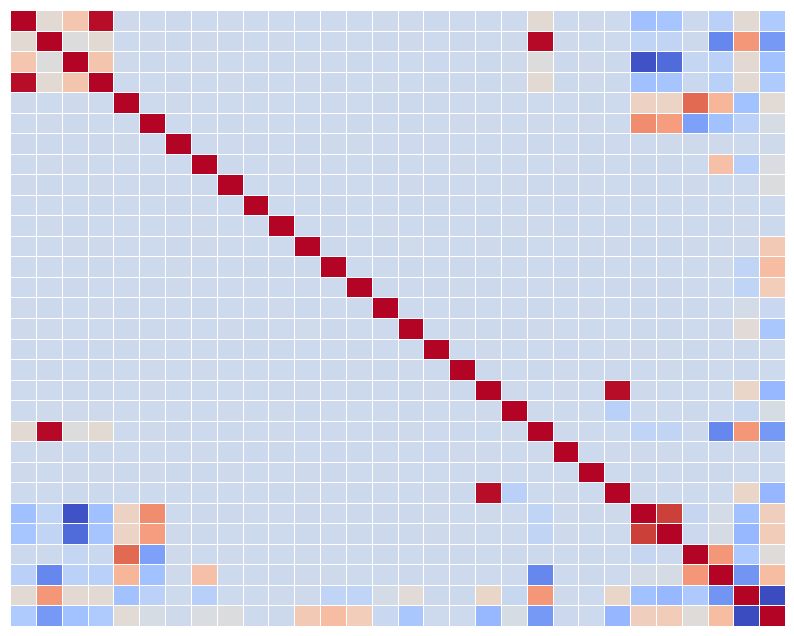

In [8]:
# Calcular la matriz de correlación
correlation_matrix = df[meta[(meta.rol != 'id') & (meta.dtype != 'object')].index].corr()

# Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='0.2f', linewidths=0.5, xticklabels=False, yticklabels=False, cbar=False)
plt.show()

In [ ]:
# Obtener el triángulo superior de la matriz de correlación
upper_triangle = np.triu(correlation_matrix, k=1)

# Crear una lista de tuplas (variable1, variable2, correlación)
correlations = []
for i in range(upper_triangle.shape[0]):
    for j in range(i + 1, upper_triangle.shape[1]):
        if abs(upper_triangle[i, j]) > 0.5:  # Filtrar por correlaciones > 0.5
            correlations.append((correlation_matrix.index[i], correlation_matrix.columns[j], upper_triangle[i, j]))

# Ordenar las correlaciones por valor absoluto de mayor a menor
correlations.sort(key=lambda x: abs(x[2]), reverse=True)

# Imprimir las correlaciones
for var1, var2, corr in correlations:
    print(f"{var1} y {var2} tienen una correlación de {corr:.2f}")

IngresoBrutoAnual y IngresoBrutoMensual tienen una correlación de 0.99
Edad y Experiencia tienen una correlación de 0.98
TotalActivos y PatrimonioNeto tienen una correlación de 0.98
TipoInteresBase y TipoInteres tienen una correlación de 0.88
CreditoAprobado y ScoreRiesgo tienen una correlación de -0.80
ScoreCrediticio y TipoInteresBase tienen una correlación de -0.76
CuantiaCredito y PagoMensualCredito tienen una correlación de 0.74
ScoreCrediticio y TipoInteres tienen una correlación de -0.66
DuracionCredito y TipoInteresBase tienen una correlación de 0.61
IngresoBrutoMensual y CreditoAprobado tienen una correlación de 0.56
PagoMensualCredito y RatioTotalDeudaIngresos tienen una correlación de 0.56
IngresoBrutoAnual y CreditoAprobado tienen una correlación de 0.56
IngresoBrutoMensual y RatioTotalDeudaIngresos tienen una correlación de -0.55
IngresoBrutoAnual y RatioTotalDeudaIngresos tienen una correlación de -0.54
DuracionCredito y TipoInteres tienen una correlación de 0.53


Observamos varias correlaciones significativas entre las variables:

* IngresoBrutoMensual e IngresoBrutoAnual: 0.99
* Edad y Experiencia: 0.98
* TotalActivos y PatrimonioNeto: 0.98
* TipoInteresBase y TipoInteres: 0.88
* CreditoAprobado y ScoreRiesgo: -0.8 (relación inversa entre las variables objetivo, como se esperaba)

Estas correlaciones indican una alta redundancia entre ciertas variables, lo cual será útil para reducir la dimensionalidad de los datos mediante la selección de las variables más representativas.

Dado el umbral de 0.9 para eliminar variables altamente correlacionadas, identificamos tres pares de variables que cumplen con este criterio. Para determinar cuál eliminar en cada par, consideraremos aquellos factores que puedan reducir el impacto en el modelo, como:
* Correlación con la variable objetivo
* Cantidad de valores nulos

In [ ]:
print("IngresoBrutoMensual vs IngresoBrutoAnual")
print("IngresoBrutoMensual: ", correlation_matrix['IngresoBrutoMensual']['CreditoAprobado'], correlation_matrix['IngresoBrutoMensual']['ScoreRiesgo'], meta.loc['IngresoBrutoMensual', 'nulos'])
print("IngresoBrutoAnual: ", correlation_matrix['IngresoBrutoAnual']['CreditoAprobado'], correlation_matrix['IngresoBrutoAnual']['ScoreRiesgo'], meta.loc['IngresoBrutoAnual', 'nulos'])

print("\nEdad vs Experiencia")
print("Edad: ", correlation_matrix['Edad']['CreditoAprobado'], correlation_matrix['Edad']['ScoreRiesgo'], meta.loc['Edad', 'nulos'])
print("Experiencia: ", correlation_matrix['Experiencia']['CreditoAprobado'], correlation_matrix['Experiencia']['ScoreRiesgo'], meta.loc['Experiencia', 'nulos'])

print("\nTotalActivos vs PatrimonioNeto")
print("TotalActivos: ", correlation_matrix['TotalActivos']['CreditoAprobado'], correlation_matrix['TotalActivos']['ScoreRiesgo'], meta.loc['TotalActivos', 'nulos'])
print("PatrimonioNeto: ", correlation_matrix['PatrimonioNeto']['CreditoAprobado'], correlation_matrix['PatrimonioNeto']['ScoreRiesgo'], meta.loc['PatrimonioNeto', 'nulos'])

print("\nTipoInteresBase vs TipoInteres")
print("TipoInteresBase: ", correlation_matrix['TipoInteresBase']['CreditoAprobado'], correlation_matrix['TipoInteresBase']['ScoreRiesgo'], meta.loc['TipoInteresBase', 'nulos'])
print("TipoInteres: ", correlation_matrix['TipoInteres']['CreditoAprobado'], correlation_matrix['TipoInteres']['ScoreRiesgo'],meta.loc['TipoInteres', 'nulos'])

IngresoBrutoMensual vs IngresoBrutoAnual
IngresoBrutoMensual:  0.564304540655735 -0.4608830320173918 0
IngresoBrutoAnual:  0.5602670085802052 -0.45871261707738625 0

Edad vs Experiencia
Edad:  0.1446633304882665 -0.16551371477670118 0
Experiencia:  0.1448664132652102 -0.1662085967248618 13000

TotalActivos vs PatrimonioNeto
TotalActivos:  0.19468484877927164 -0.2945444904254888 0
PatrimonioNeto:  0.19875713233516493 -0.30096228599565056 0

TipoInteresBase vs TipoInteres
TipoInteresBase:  -0.2360428248063838 0.2529176839037446 0
TipoInteres:  -0.2923815590280856 0.2726138477869754 0


En este caso, las variables a eliminar serán: **IngresoBrutoAnual**, **Experiencia** y **TotalActivos**. Las diferencias de correlación con la variable objetivo son mínimas, como era de esperarse debido a su alta correlación entre sí.

Para el par Edad y Experiencia, decidimos mantener Edad, dado que Experiencia presenta un alto número de valores nulos y la diferencia en su correlación con la variable objetivo es insignificante.

Asimismo, podríamos considerar eliminar TipoInteresBase, ya que tiene una alta correlación con TipoInteres, y su eliminación podría simplificar el modelo sin pérdida significativa de información. Aunque finalmente no hemos decidido eliminarlo.

In [ ]:
meta.loc[['IngresoBrutoAnual', 'Experiencia', 'TotalActivos'], 'keep'] = False
print("Total de variables: ", meta.shape[0])
print("Variables a emplear: ", meta[meta.keep].shape[0])

Total de variables:  36
Variables a emplear:  32


#### Análisis de varianza

Para reducir aún más la dimensionalidad, consideraremos la varianza de cada variable. Aquellas variables con varianza cero serán eliminadas, ya que, al tener un valor constante, no aportan información relevante para la predicción de la variable objetivo. Dichas columnas carecen de valor predictivo y pueden ser descartadas directamente sin afectar el desempeño del modelo.

In [42]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold

filtered_variables = meta[
    (meta.dtype == 'object') | (~meta.keep) | (meta.rol == 'objetivo')
].index
print(filtered_variables)

selector = VarianceThreshold(threshold=0.0)
selector.fit(df.drop((filtered_variables), axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = df.drop(filtered_variables, axis=1).columns[f(selector.get_support())]
print('{} variables tienen poca varianza.'.format(len(v)))
print('Estas variables son {}'.format(list(v)))


Index(['Id', 'SituacionLaboral', 'NivelEducativo', 'EstadoCivil',
       'EstadoVivienda', 'ObjetoCredito', 'CreditoAprobado', 'ScoreRiesgo'],
      dtype='object', name='varname')
0 variables tienen poca varianza.
Estas variables son []


No se encontraron variables con varianza cero. Si elevamos el umbral a 0.1, se identifican 8 variables con baja varianza. Sin embargo, hemos decidido no eliminar ninguna en este caso y permitir que los distintos modelos seleccionen las variables más relevantes. A lo largo del análisis, también probaremos otros métodos de reducción de dimensionalidad, como PCA.

### Normalización y estandarización

Es crucial normalizar las variables, dado que muchos algoritmos de machine learning calculan distancias euclidianas. Sin normalización, las características con mayores magnitudes podrían sesgar el modelo, afectando los resultados. Al normalizar, prevenimos que estas diferencias influyan de forma desproporcionada.

Primero, observemos la distribución de las variables.

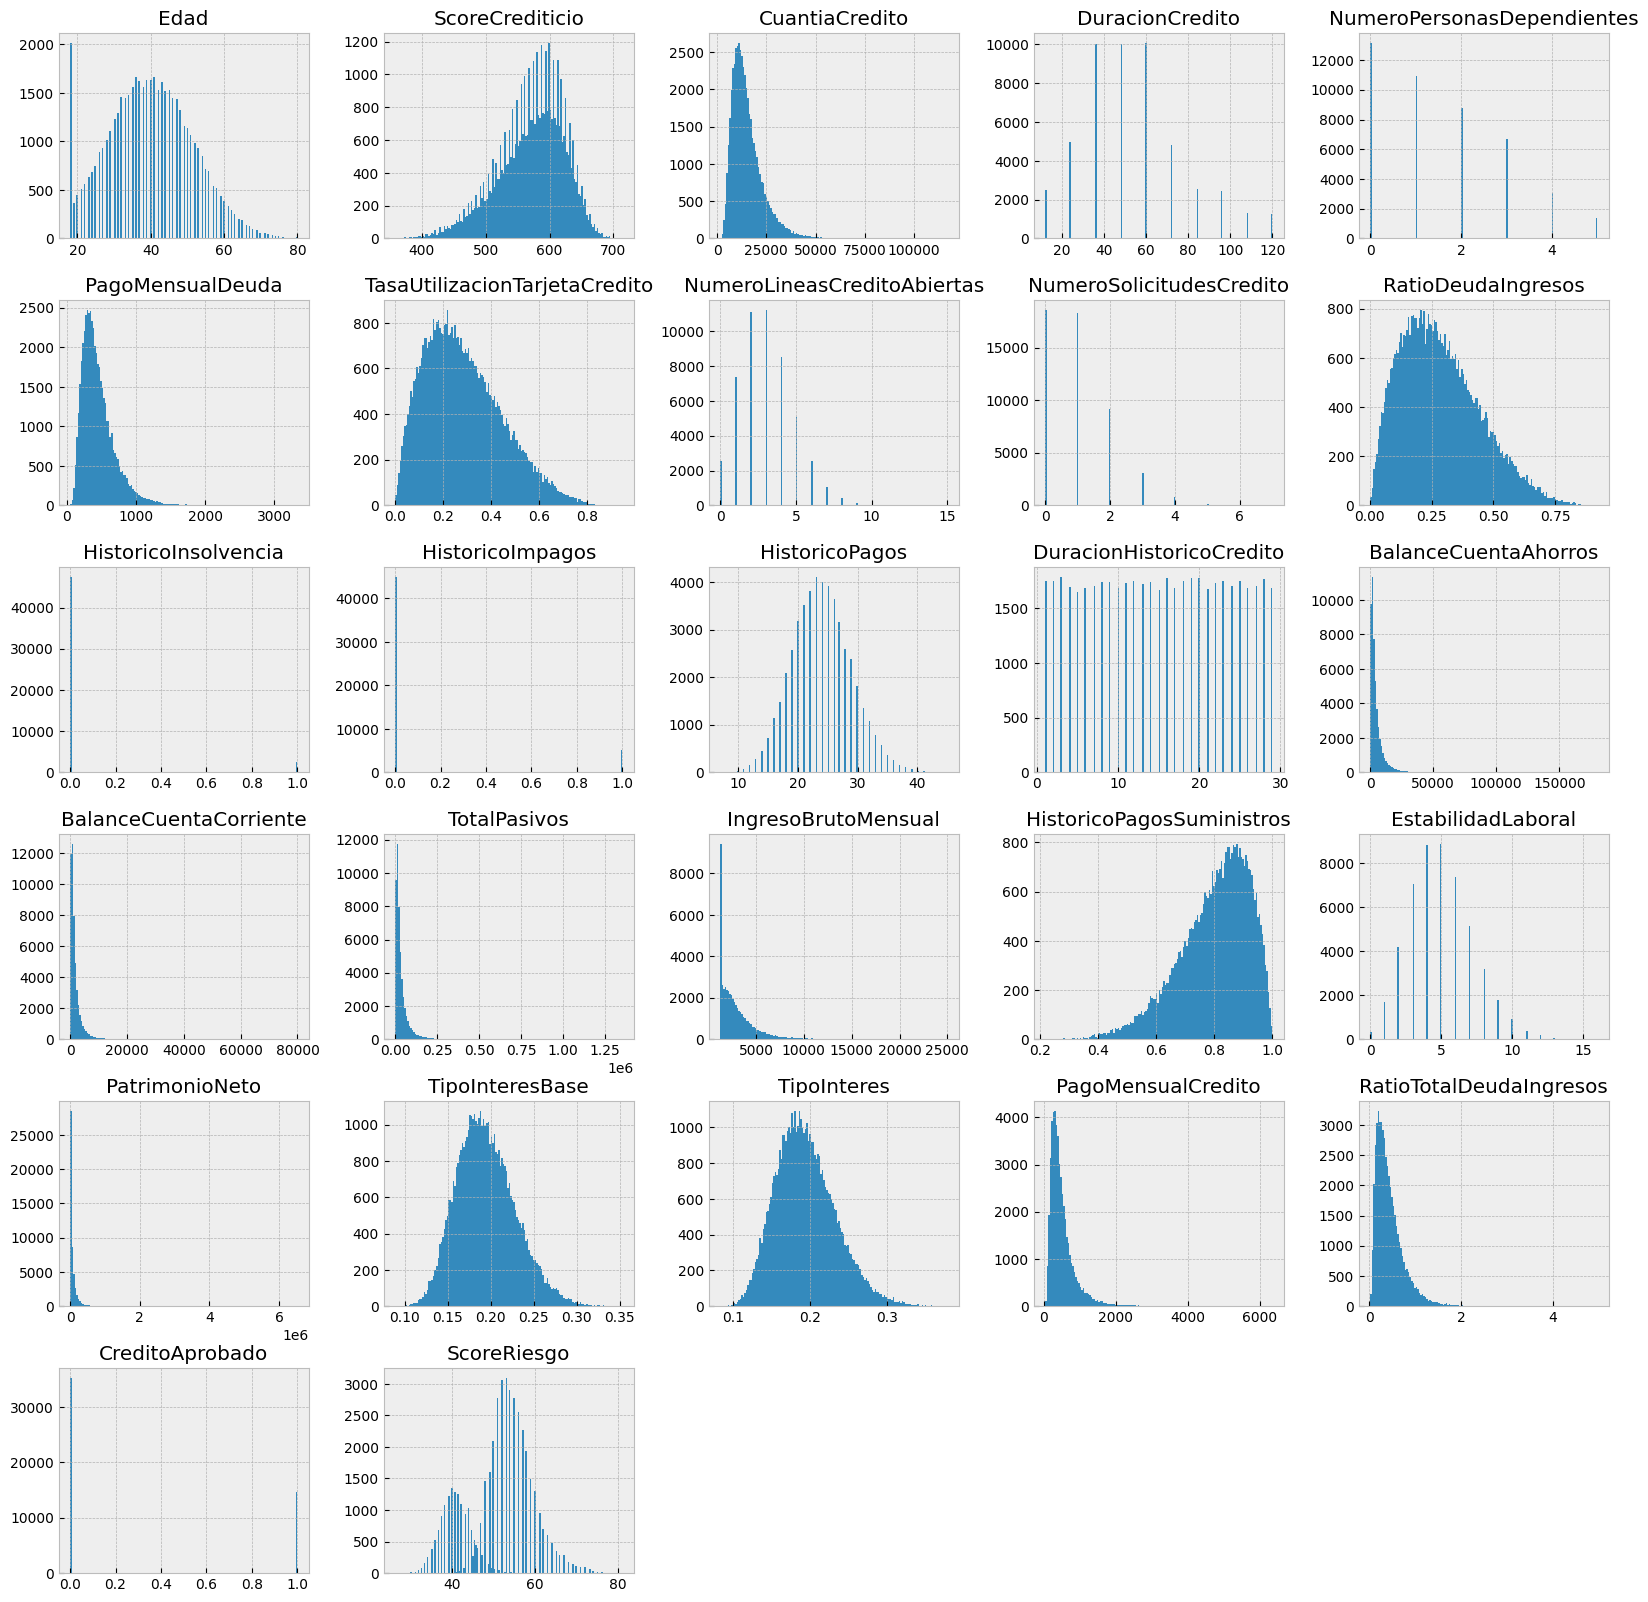

In [ ]:
v = meta[(meta.keep) & (meta.rol != 'id')].index

df[v].hist(figsize=(20, 20), bins = 150)
plt.show()

Observamos que algunas variables presentan distribuciones normales desplazadas, otras distribuciones uniformes o incluso distribuciones bimodales. Para las variables predictoras, planeamos aplicar una estandarización en los modelos que asumen normalidad en los datos. Asimismo, aplicaremos normalización en los modelos que calculan distancias (como KNN y PCA) o en aquellos donde pueda mejorar el rendimiento computacional, como en métodos basados en descenso de gradiente.

### Análisis de outliers

In [43]:
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    minmax_scale,
)

Como continuación del análisis anterior, probaremos todos los scalers de sklearn para identificar el más adecuado para normalizar los datos y mitigar el impacto de posibles outliers. Presentaremos dos gráficos por cada scaler:
* En la figura de la izquierda, se mostrará un diagrama de dispersión del conjunto de datos completo.
* En la figura de la derecha, se excluirán los valores extremos, considerando solo el 99% de los datos y eliminando los outliers.

In [46]:
df_num = df[meta[(meta.keep) & (meta.dtype != 'object')].index]

feature_mapping = {
    "IngresoBrutoAnual": "Ingreso Bruto Anual",
    "CuantiaCredito" : "Cuantía del Crédito",
    "PagoMensualDeuda": "Pago Mensual de Deuda",
    "BalanceCuentaAhorros": "Balance Cuenta Ahorros",
    "BalanceCuentaCorriente": "Balance Cuenta Corriente",
    "TotalActivos": "Total Activos",
    "TotalPasivos": "Total Pasivos",
    "IngresoBrutoMensual": "Ingreso Bruto Mensual",
    "PatrimonioNeto": "Patrimonio Neto",
    "PagoMensualCredito": "Pago Mensual Crédito",
    "RatioTotalDeudaIngresos": "Ratio Total Deuda Ingresos",
}

features = ["IngresoBrutoAnual", "PatrimonioNeto"]

# Seleccionar solo las columnas que necesitas
X_selected = df_num[features].to_numpy()

distributions = [
    ("Unscaled data", X_selected),
    ("Data after standard scaling", StandardScaler().fit_transform(X_selected)),
    ("Data after min-max scaling", MinMaxScaler().fit_transform(X_selected)),
    ("Data after max-abs scaling", MaxAbsScaler().fit_transform(X_selected)),
    (
        "Data after robust scaling",
        RobustScaler(quantile_range=(25, 75)).fit_transform(X_selected),
    ),
    (
        "Data after power transformation (Yeo-Johnson)",
        PowerTransformer(method="yeo-johnson").fit_transform(X_selected),
    ),
    (
        "Data after power transformation (Box-Cox)",
        PowerTransformer(method="box-cox").fit_transform(X_selected),
    ),
    (
        "Data after quantile transformation (uniform pdf)",
        QuantileTransformer(
            output_distribution="uniform", random_state=42
        ).fit_transform(X_selected),
    ),
    (
        "Data after quantile transformation (gaussian pdf)",
        QuantileTransformer(
            output_distribution="normal", random_state=42
        ).fit_transform(X_selected),
    ),
    ("Data after sample-wise L2 normalizing", Normalizer().fit_transform(X_selected)),
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y)

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, "plasma_r", cm.hot_r)


def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return (
        (ax_scatter, ax_histy, ax_histx),
        (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
        ax_colorbar,
    )


def plot_distribution(axes, X, y, hist_nbins=50, title="", x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker="o", s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(
        X[:, 1], bins=hist_nbins, orientation="horizontal", color="grey", ec="grey"
    )
    hist_X1.axis("off")

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(
        X[:, 0], bins=hist_nbins, orientation="vertical", color="grey", ec="grey"
    )
    hist_X0.axis("off")

In [48]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(
        axarr[0],
        X,
        y,
        hist_nbins=200,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="Full data",
    )

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) & np.all(
        X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1
    )
    plot_distribution(
        axarr[1],
        X[non_outliers_mask],
        y[non_outliers_mask],
        hist_nbins=50,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="Zoom-in",
    )

    norm = mpl.colors.Normalize(y.min(), y.max())
    mpl.colorbar.ColorbarBase(
        ax_colorbar,
        cmap=cmap,
        norm=norm,
        orientation="vertical",
        label="Color mapping for values of y",
    )

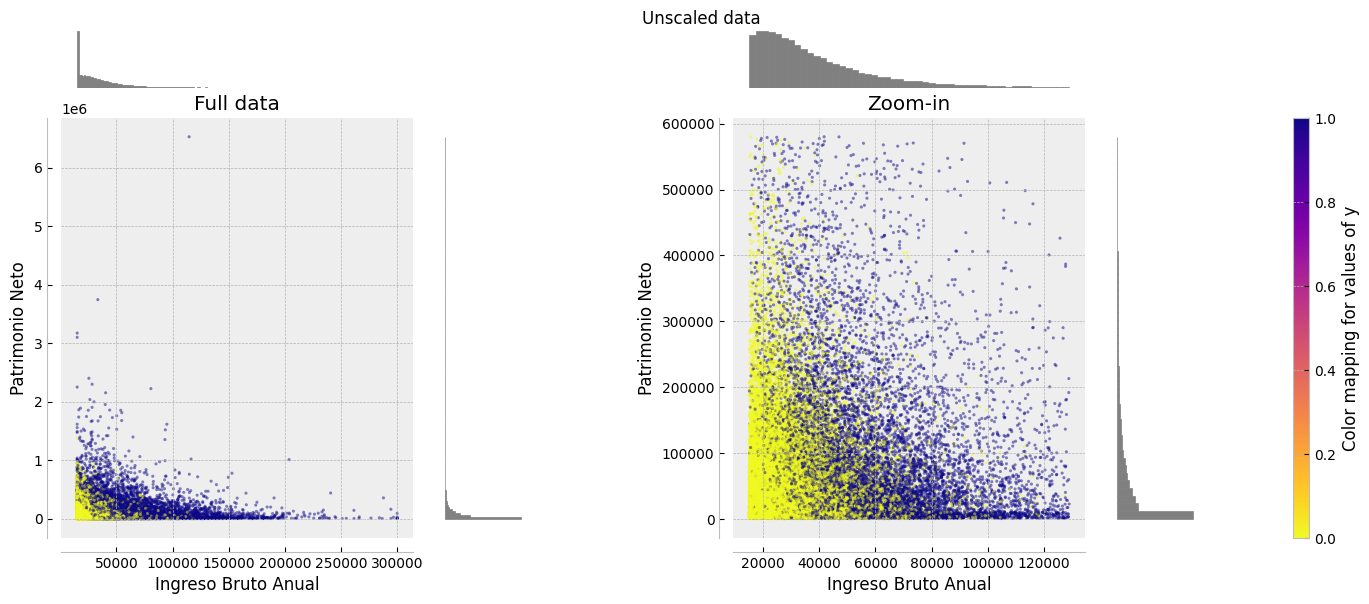

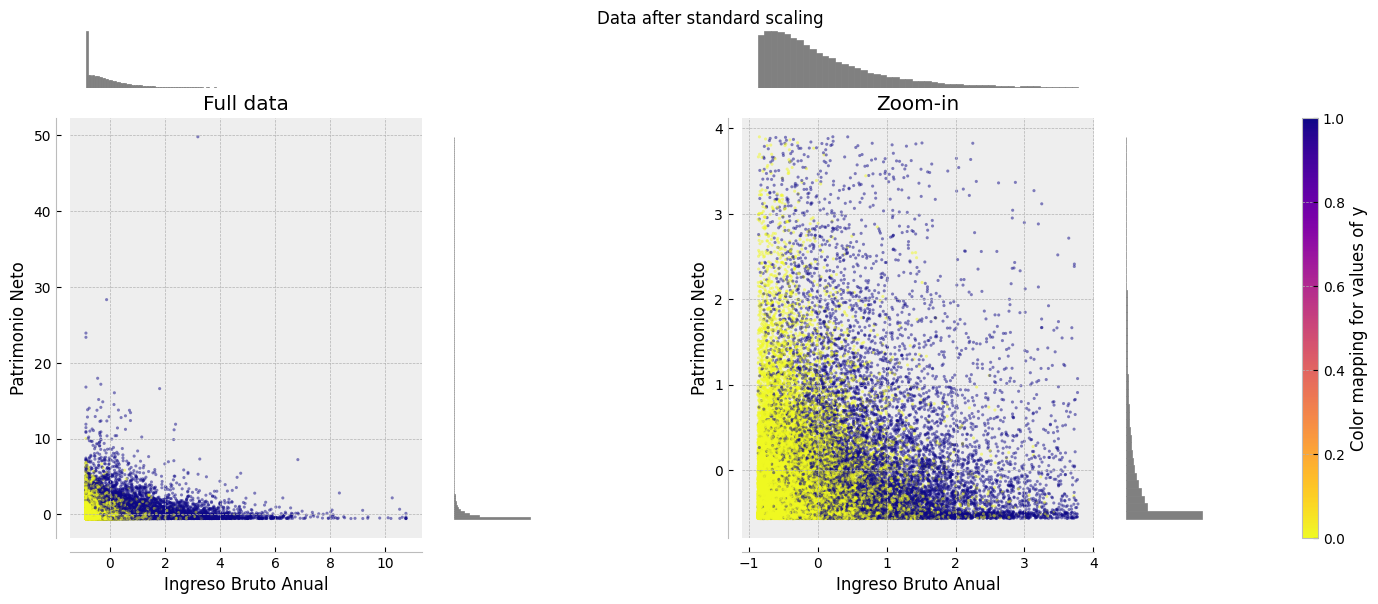

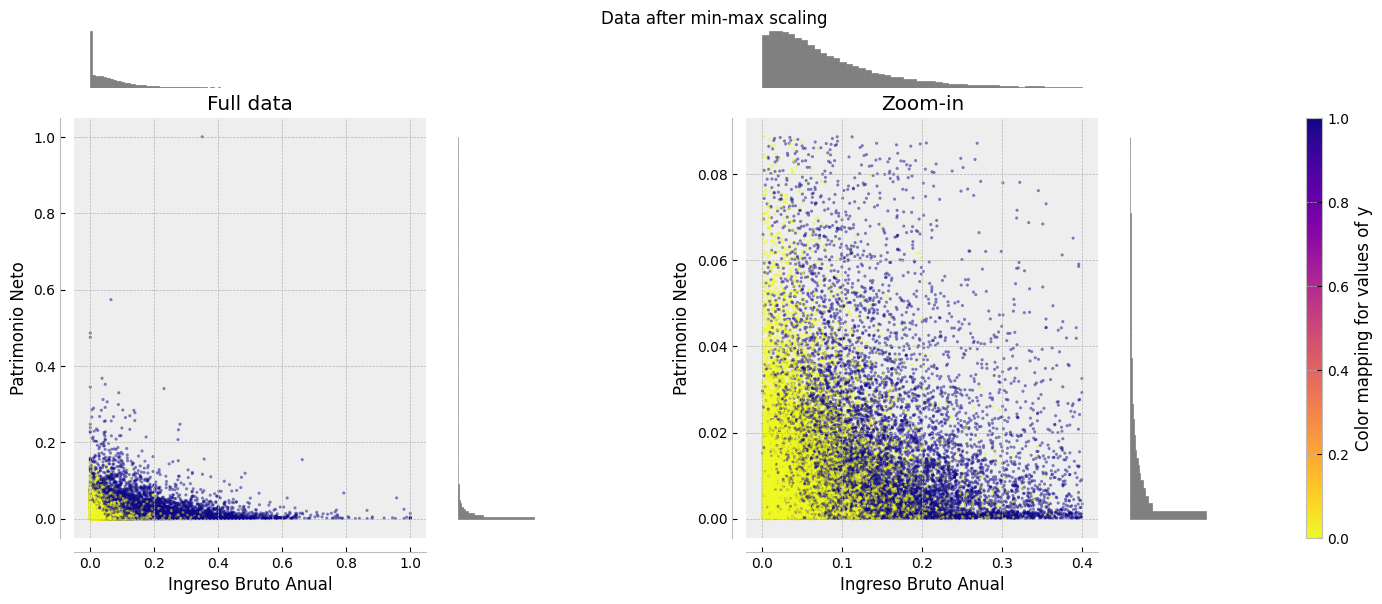

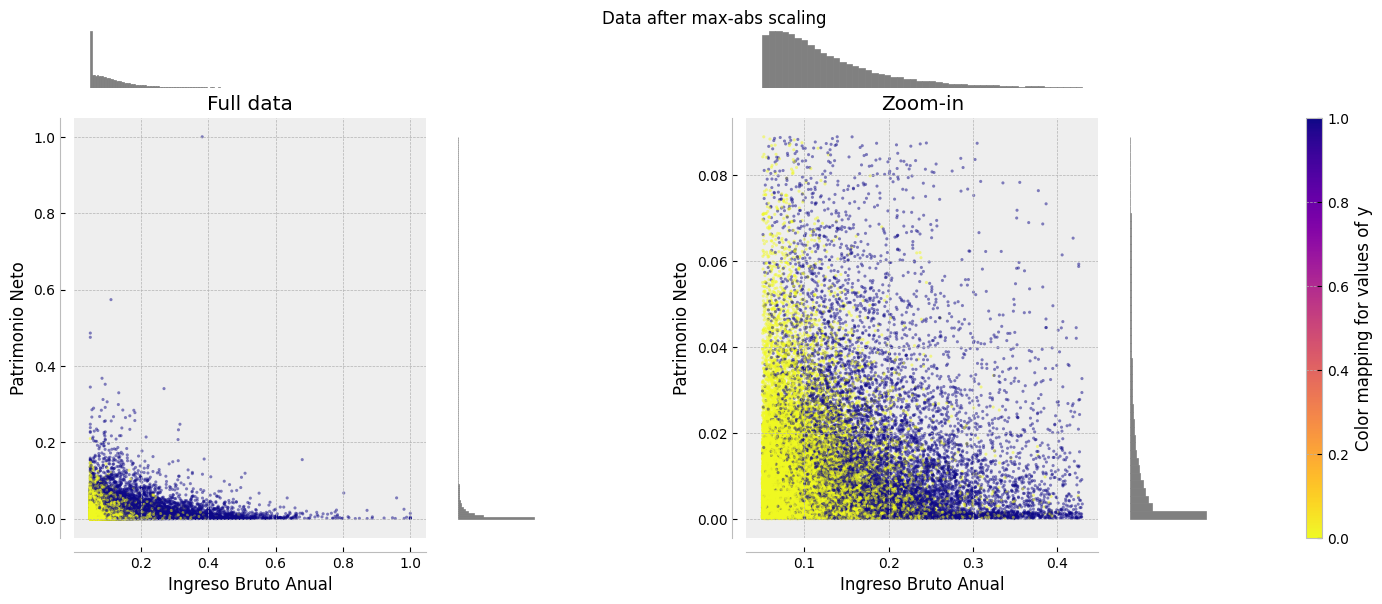

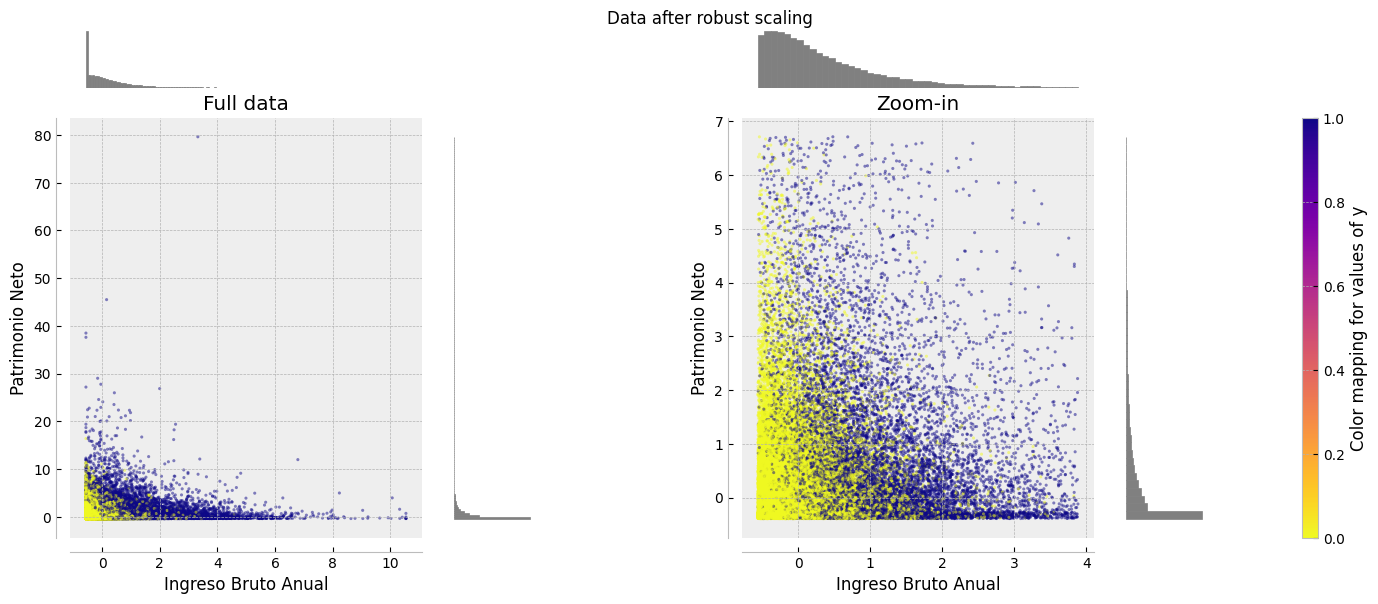

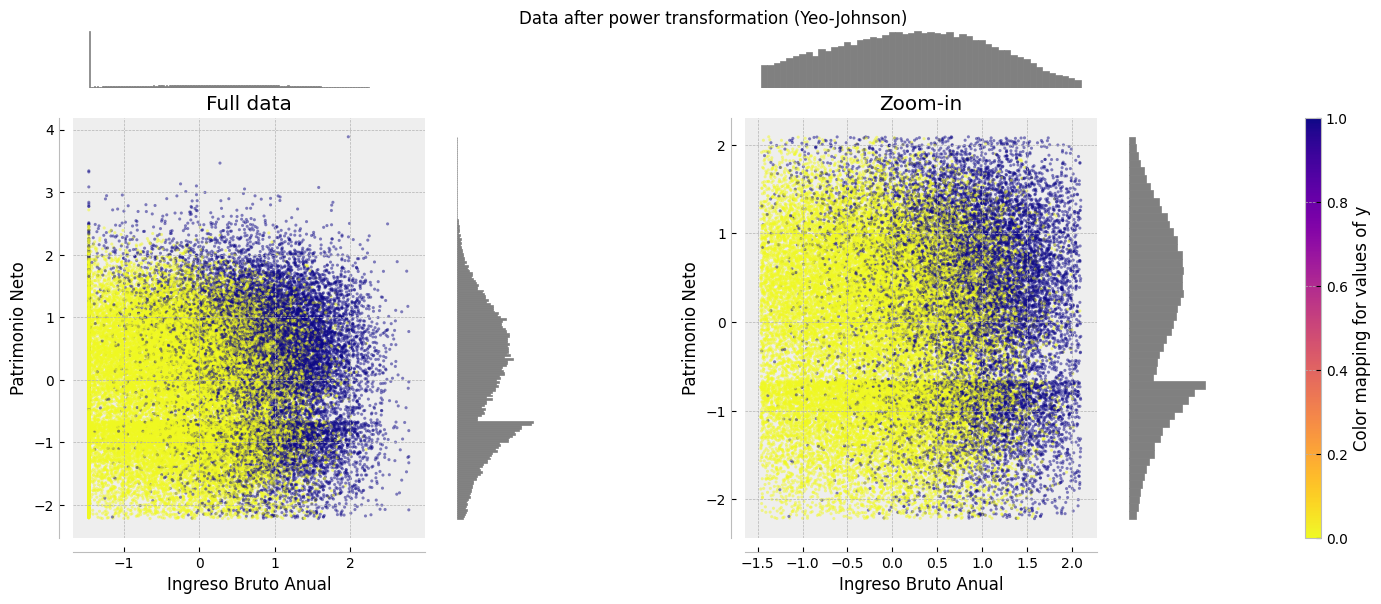

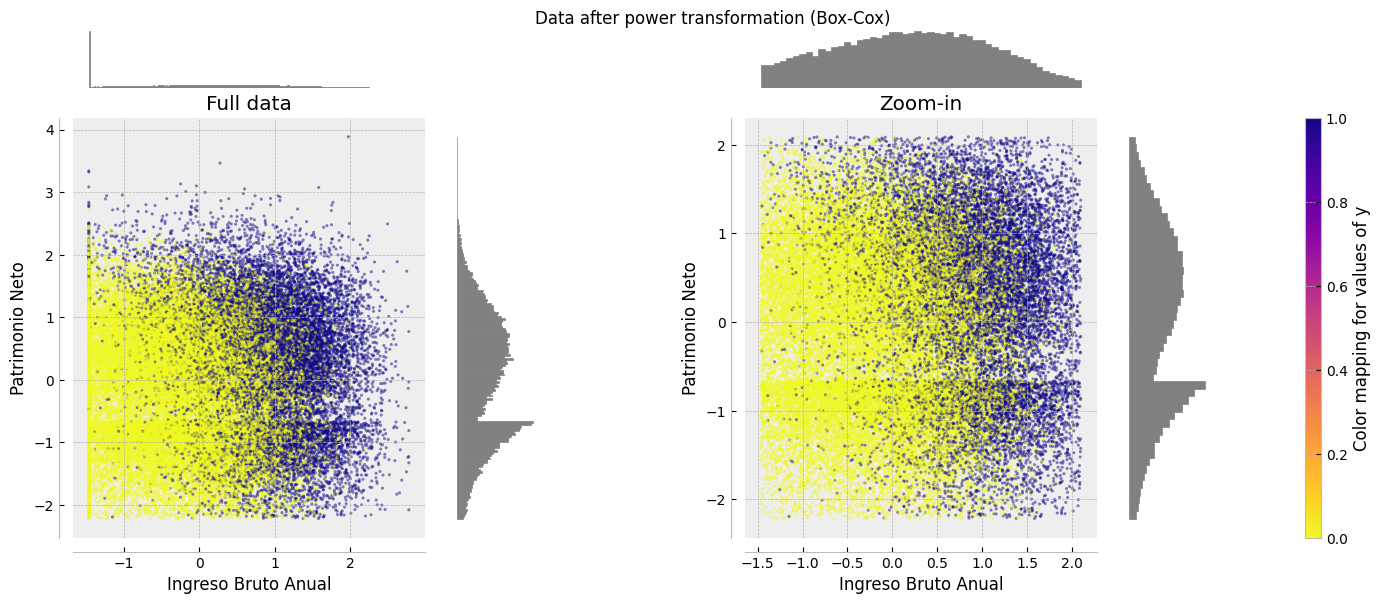

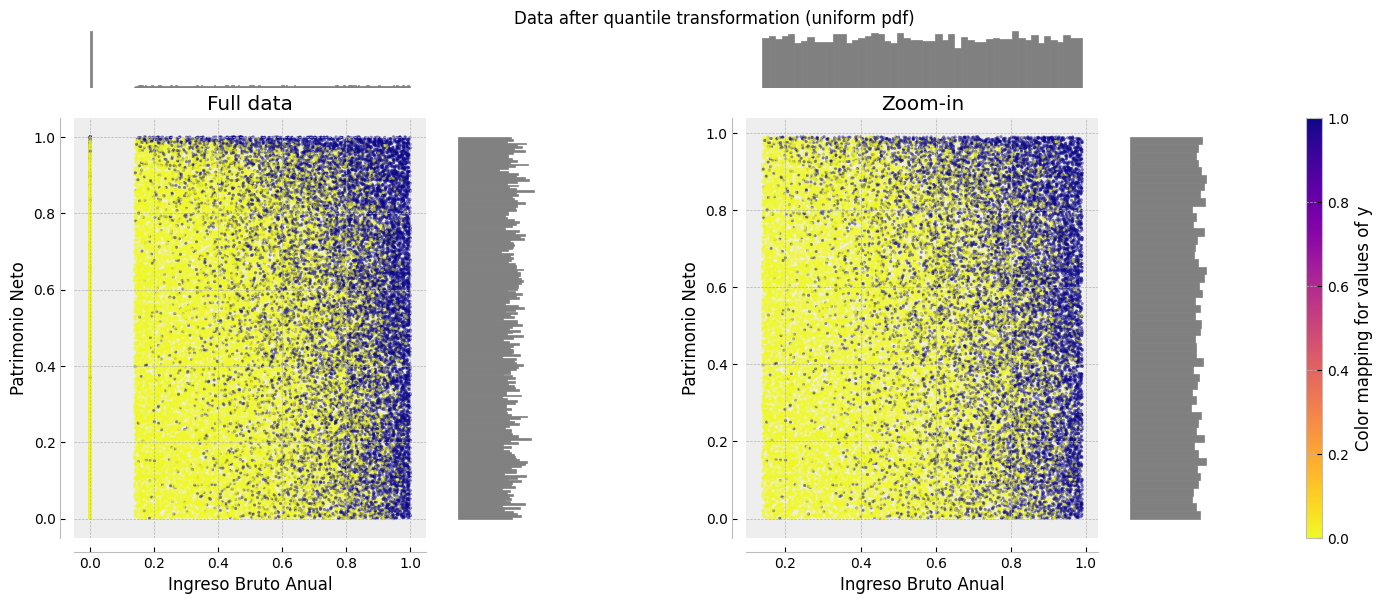

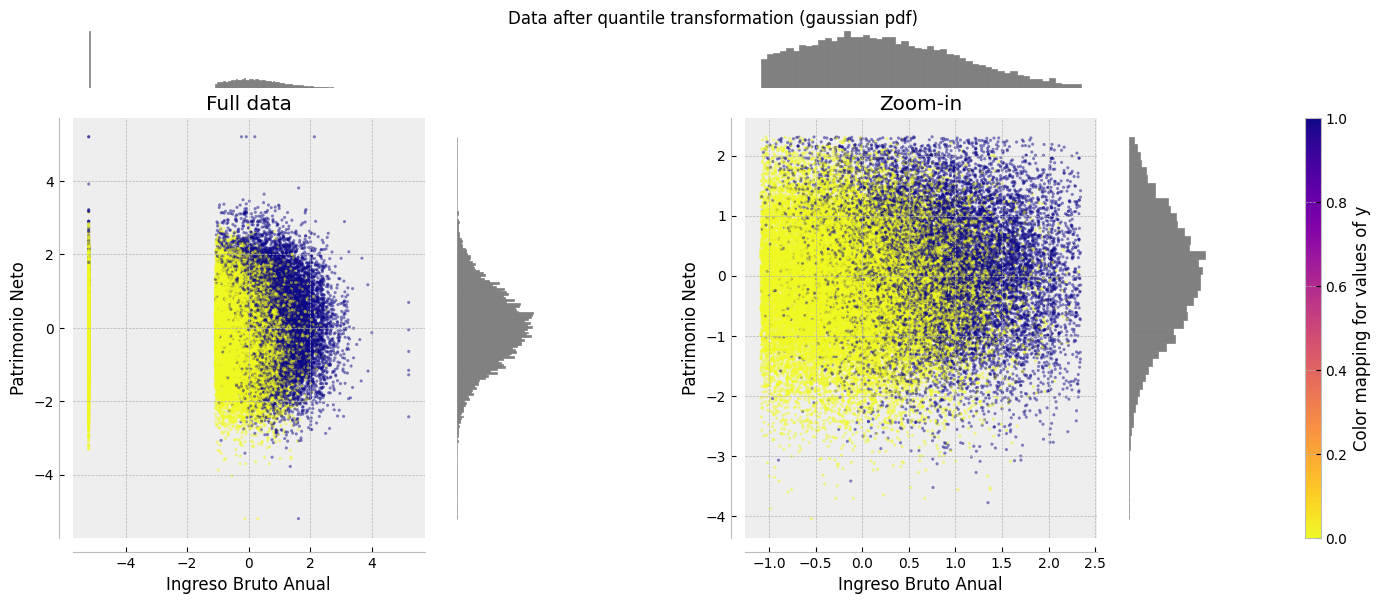

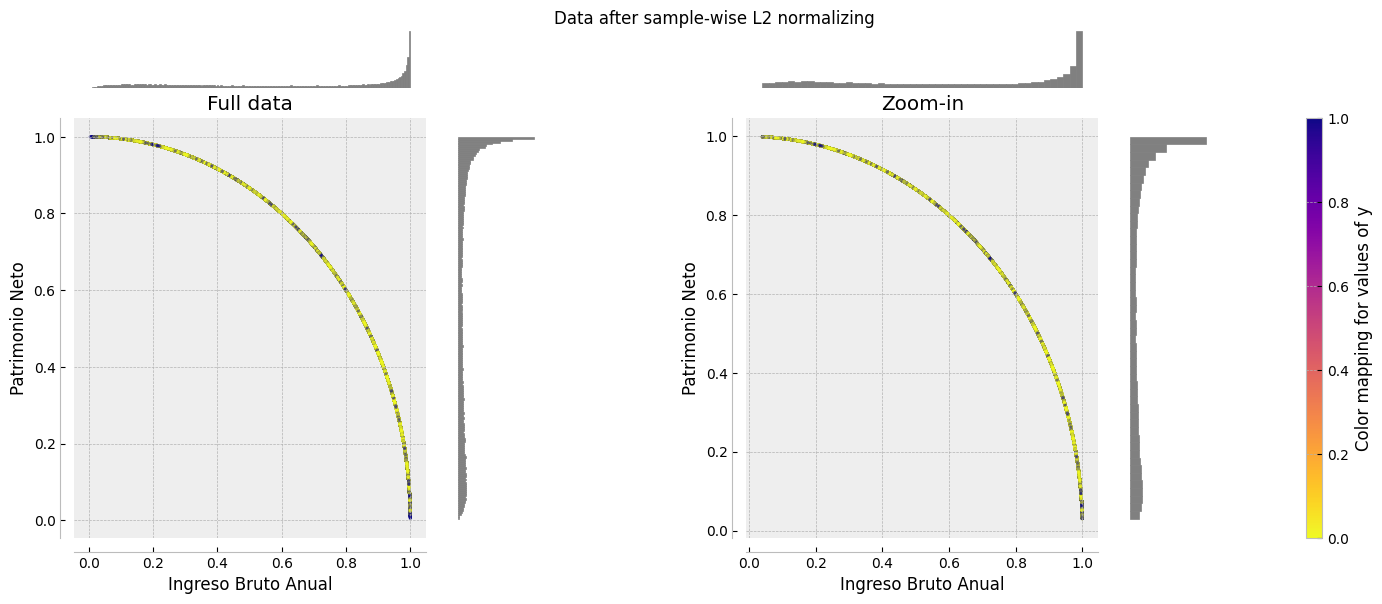

In [51]:
for i in range(len(distributions)):
    make_plot(i)
    plt.show()

En caso de emplear un modelo sensible a outliers, observamos que los scalers que mejor funcionan son PowerTransformer y QuantileTransformer. Después de evaluar ambos, optamos por utilizar PowerTransformer, ya que además de reducir el impacto de los outliers, aproxima la distribución de los datos a una forma más gaussiana, lo cual puede beneficiar a modelos que asumen normalidad. Este ajuste ayuda a mejorar la estabilidad y precisión de los modelos que son sensibles a valores extremos, como KNN y métodos de regresión lineal.

Para complementar, PowerTransformer aplica transformaciones como Box-Cox o Yeo-Johnson, que estabilizan la varianza y minimizan la asimetría, especialmente útil cuando las variables tienen distribuciones sesgadas. De esta manera, logramos una representación más equilibrada y menos afectada por valores atípicos en nuestro conjunto de datos.

Ejemplo

In [52]:
# Crear una instancia de RobustScaler
scaler = PowerTransformer(method='yeo-johnson')

df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)
df_num_scaled.head()

Edad  IngresoBrutoAnual  ScoreCrediticio  Experiencia  CuantiaCredito  \
0  0.399434          -0.541737         0.814023     0.331589        0.368980   
1 -1.201258           0.003375         0.119535    -1.868322       -0.260202   
2 -0.109115           1.633880        -1.236148     0.087928       -0.746397   
3  0.968665           0.042118        -1.281632     0.712263       -1.790935   
4 -0.022872          -0.693762        -0.657477     0.003617        0.196846   

   DuracionCredito  NumeroPersonasDependientes  PagoMensualDeuda  \
0         0.368324                   -1.300912          0.379023   
1        -1.316518                    1.062812          1.144926   
2        -0.660412                         NaN         -1.714349   
3        -0.660412                   -0.166634         -0.005707   
4         0.368324                   -0.166634         -1.013282   

   TasaUtilizacionTarjetaCredito  NumeroLineasCreditoAbiertas  ...  \
0                       0.753379                    -0.504210  ...   
1                       0.743209                    -1.218781  ...   
2                       0.577087                    -0.504210  ...   
3                       0.120563                     1.126216  ...   
4                      -0.793192                     1.575696  ...   

   IngresoBrutoMensual  HistoricoPagosSuministros  EstabilidadLaboral  \
0            -0.532722                  -0.406399           -1.434715   
1             0.014221                        NaN            0.510634   
2             1.646053                   0.652243           -0.381002   
3             0.053072                  -0.185283            0.079888   
4            -0.685353                  -0.844410           -0.880962   

   PatrimonioNeto  TipoInteresBase  TipoInteres  PagoMensualCredito  \
0       -0.023595        -0.381288    -0.542017           -0.051971   
1        0.940888        -1.007097    -0.508471            0.549818   
2        0.231365         0.402148     0.651410           -0.276450   
3       -1.799518         0.337791     0.171653           -1.233584   
4       -0.723656         0.626524     0.551678           -0.049342   

   RatioTotalDeudaIngresos  CreditoAprobado  ScoreRiesgo  
0                 0.463373        -0.644133    -0.103363  
1                 0.654528        -0.644133     0.404111  
2                -1.873664         1.552474    -1.053903  
3                -0.609331         1.552474    -0.655969  
4                 0.041700        -0.644133     1.302948  

[5 rows x 30 columns]

array([[<Axes: title={'center': 'Edad'}>,
        <Axes: title={'center': 'IngresoBrutoAnual'}>,
        <Axes: title={'center': 'ScoreCrediticio'}>,
        <Axes: title={'center': 'Experiencia'}>,
        <Axes: title={'center': 'CuantiaCredito'}>],
       [<Axes: title={'center': 'DuracionCredito'}>,
        <Axes: title={'center': 'NumeroPersonasDependientes'}>,
        <Axes: title={'center': 'PagoMensualDeuda'}>,
        <Axes: title={'center': 'TasaUtilizacionTarjetaCredito'}>,
        <Axes: title={'center': 'NumeroLineasCreditoAbiertas'}>],
       [<Axes: title={'center': 'NumeroSolicitudesCredito'}>,
        <Axes: title={'center': 'RatioDeudaIngresos'}>,
        <Axes: title={'center': 'HistoricoInsolvencia'}>,
        <Axes: title={'center': 'HistoricoImpagos'}>,
        <Axes: title={'center': 'HistoricoPagos'}>],
       [<Axes: title={'center': 'DuracionHistoricoCredito'}>,
        <Axes: title={'center': 'BalanceCuentaAhorros'}>,
        <Axes: title={'center': 'BalanceC

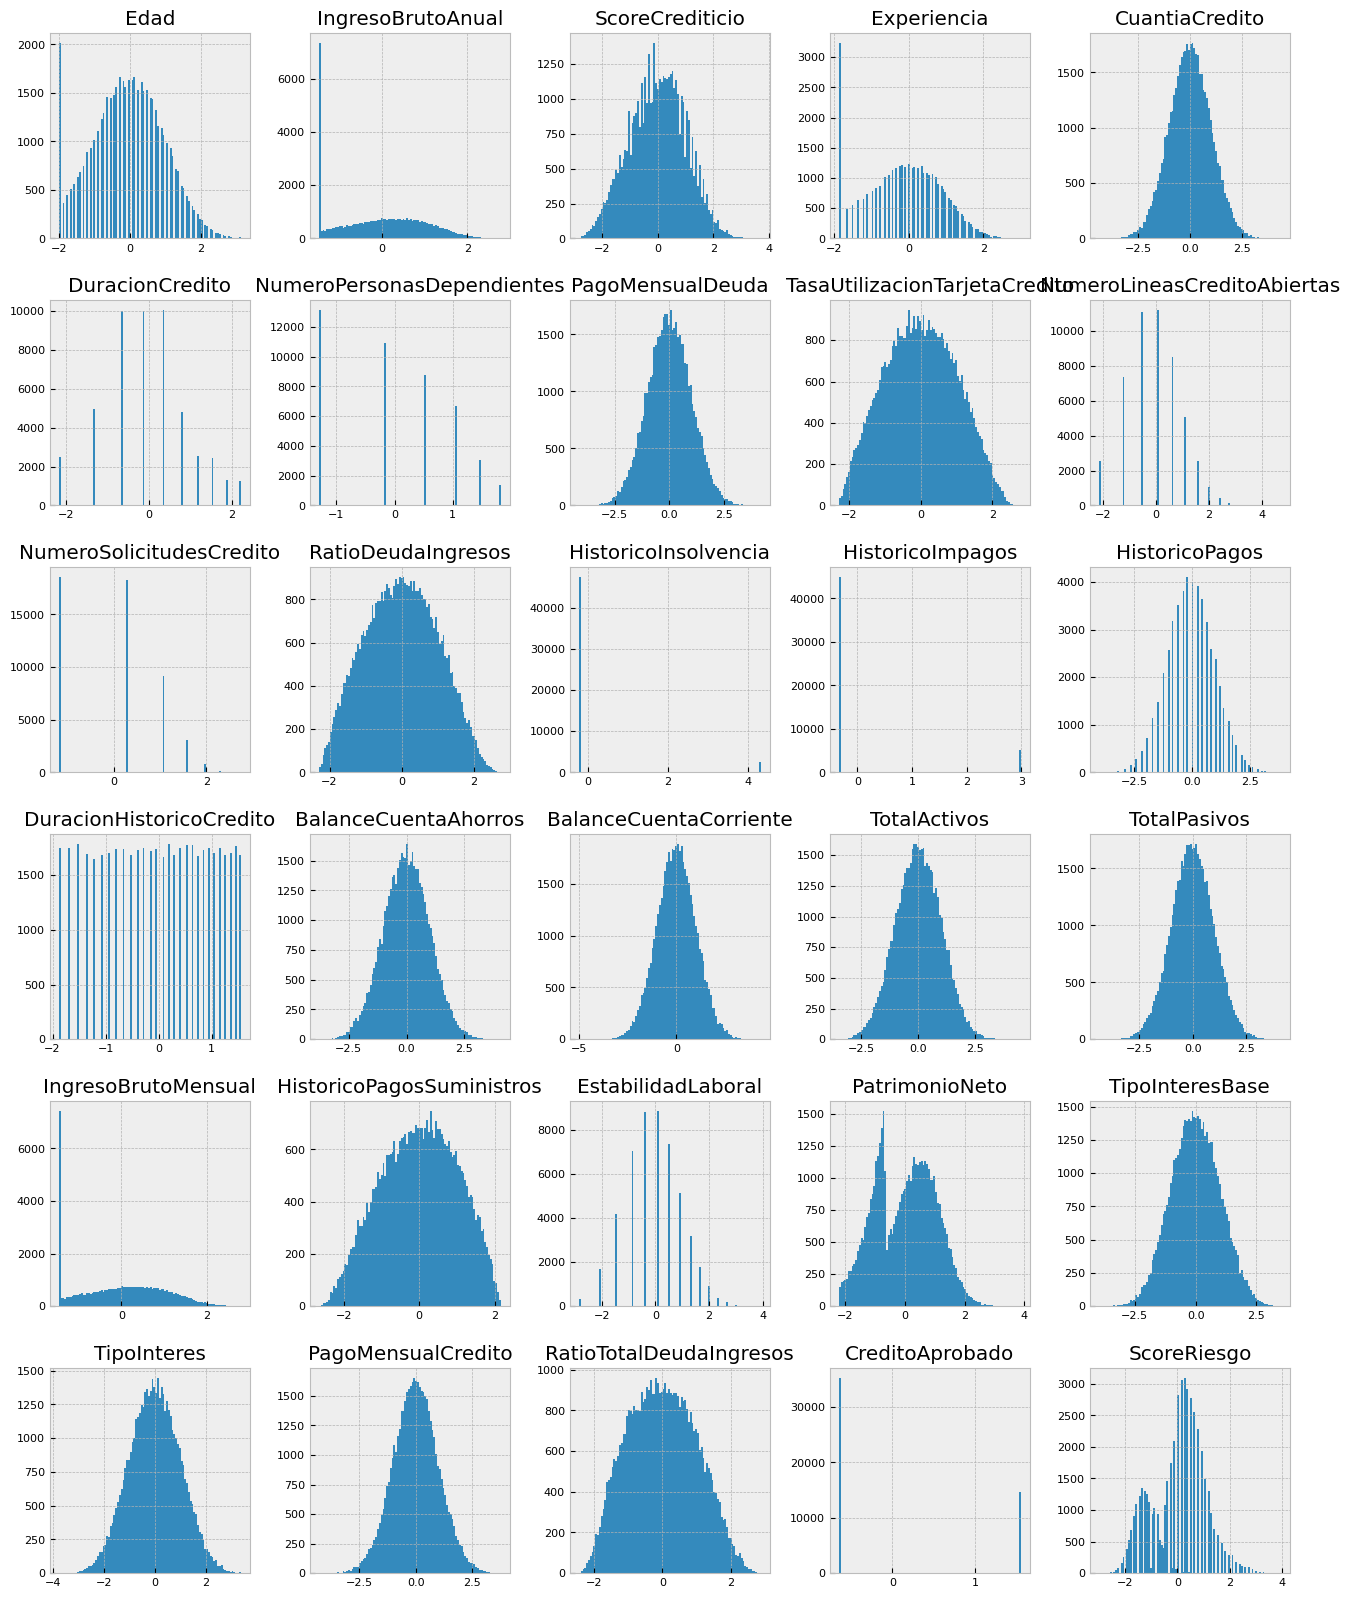

In [53]:
df_num_scaled.hist(figsize=(16, 20), bins=100, xlabelsize=8, ylabelsize=8)

# Regresión

Ahora nos enfocaremos en el problema de regresión para predecir el nivel de riesgo asociado a una operación crediticia. Para ello, aplicaremos distintos modelos de regresión y evaluaremos su rendimiento mediante métricas clave, como el error absoluto medio (MAE), que mide la precisión de las predicciones sin penalizar en exceso los errores grandes, y el coeficiente de determinación (R²), que indica qué tan bien el modelo explica la variabilidad del riesgo.

## Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, VotingRegressor, BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, PowerTransformer, QuantileTransformer, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import matplotlib.pyplot as plt

## Preparación de Datos para Regresión

Primero, eliminamos las variables identificadas para descartar en el análisis previo, así como la otra variable objetivo (CreditoAprobado). Luego, dividimos el conjunto de datos en variables predictoras (X) y la variable objetivo (y). A continuación, identificamos las variables categóricas y numéricas para su posterior preprocesamiento, y separamos el conjunto en datos de entrenamiento y prueba.

In [ ]:
# Leer el CSV
data = pd.read_csv('../../data/EstudioCrediticio_TrainP.csv')

# Eliminar la primera columna
data = data.iloc[:, 1:]
# Eliminar la penúltima columna
data = data.iloc[:, :-2].join(data.iloc[:, -1])
# Eliminar las columnas con correlación alta (más de 0.9)
data = data.drop(['IngresoBrutoAnual', 'Experiencia', 'TotalActivos'], axis=1)

# Separar las características (X) y la variable a predecir (y)
X = data.iloc[:, :-1]  # Todas las columnas menos la última
y = data.iloc[:, -1]   # La última columna

# Identificar columnas numéricas y categóricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

### Creación de Pipelines

Según los resultados de la primera sección, se crearán las siguientes pipelines para el preprocesamiento de los datos:
* Para las variables categóricas, se aplicará una imputación basada en la moda y se utilizará un OneHotEncoder para convertirlas en arrays numéricas.
* Para las variables numéricas, se usará una imputación basada en la media, y luego se escalarán aplicando un PowerTransformer. Esta transformación de potencia ayuda a que los datos se aproximen a una distribución gaussiana, reduciendo el impacto de los valores atípicos. Dado que existen valores tanto positivos como negativos, se empleará el método yeo-johnson.

In [ ]:
# Pipeline para variables categóricas (Imputación + OneHotEncoder)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar con el valor más frecuente
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline para variables numéricas (Imputación + Escalado)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar con la media
    ('scaler', PowerTransformer(method='yeo-johnson')), # Escalar debido a outliers
])

# Combinación de transformaciones para columnas categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

En segundo lugar, nos preguntamos: ¿Cuál es el **mejor modelo de regresión Lineal**?

Se usará una Pipeline final que une el **preprocesamiento** de datos con el **regresor**, y posteriormente se realizará **validación cruzada** para comprobar que modelo de regresión lineal da mejor rendimiento. Se probará con _LinearRegression()_, _Ridge()_ que incluye penalización L2, _Lasso()_ que incluye regularización L1, y _ElasticNet()_ que utiliza ambas penalizaciones.

In [ ]:
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet()]

for regressor in models:
    # Crear pipeline final con preprocesamiento y modelo
    model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', regressor)
    ])

    # Definir la estrategia de validación cruzada con KFold
    kfold = KFold(n_splits=10, shuffle=True, random_state=73)

    # Usar cross_val_score para evaluar el modelo utilizando KFold
    results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')

    # Mostrar los resultados
    print(f'Accuracy promedio {model.named_steps['regressor']}: {results.mean()}')

Accuracy promedio LinearRegression(): 0.7628997824842334
Accuracy promedio Ridge(): 0.7629229366104635
Accuracy promedio Lasso(): 0.6182332965886205
Accuracy promedio ElasticNet(): 0.6051881813789377


Se observa que tanto la Regresión Lineal como Ridge ofrecen un rendimiento similar y funcionan mejor en nuestro conjunto de datos. No obstante, los resultados obtenidos no son satisfactorios.

### Evaluación del modelo mediante train, test y métricas

También queremos obtener métricas como la raíz del error cuadrático medio o el error absoluto medio además del R^2 score.

Para ello, dividimos el conjunto de datos en train y test, entrenamos y evaluamos.

Usaremos en este caso la Regresión Lineal:

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
    ])

# Entrenar el modelo
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  Index(['Edad', 'ScoreCrediticio', 'CuantiaCredito', 'DuracionCredito',
       'NumeroPersonasDependientes', 'PagoMensualDeuda',
       'TasaUtilizacionTarjetaCredito', 'NumeroLineasCreditoAbiertas',
       'NumeroSolicitudesCredito'...
       'TipoInteresBase', 'TipoInteres', 'PagoMensualCredito',
       'RatioTotalDeudaIngresos'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['SituacionLaboral', 'NivelEducativo', 'EstadoCivil', 'EstadoVivienda',
       'ObjetoCredito'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [ ]:
y_pred = model.predict(X_test)

# Calcular métricas para regresión
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

RMSE: 3.870826795435466
MAE: 3.2124556616210933
R²: 0.7610885897526452


Vemos que los resultados no son satisfactorios. Unos valores tan malos pueden deberse a que existen multiples variables que no mantienen una relación lineal con la variable objetivo, o que no se han tenido en cuenta interacciones entre variables.

### Regresión Polinómica

Probamos ahora añadiendo todas las combinaciones de variables polinómicas de grado 2. Para ello, se emplea PolynomialFeatures y se entrena un modelo de regresión lineal con estas nuevas variables.

In [ ]:
class PearsonCorrelationFilter(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.9):
        self.threshold = threshold

    def fit(self, X, y=None):
        self.to_drop_ = self._get_correlated_features(X)
        return self

    def transform(self, X):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
        return X.drop(columns=self.to_drop_, errors='ignore')

    def _get_correlated_features(self, X):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
        corr_matrix = X.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        to_drop = [column for column in upper.columns if any(upper[column] > self.threshold)]
        return to_drop

In [ ]:
# Pipeline para variables categóricas (Imputación + OneHotEncoder)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar con el valor más frecuente
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline para variables numéricas (Imputación + Escalado)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar con la media
    ('scaler', PowerTransformer(method='yeo-johnson')), # Escalar debido a outliers
])

# Combinación de transformaciones para columnas categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('polfeatures', PolynomialFeatures(degree=2)),
    ('pearson_filter', PearsonCorrelationFilter(threshold=0.9)),
    ('regressor', LinearRegression())
    ])

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  Index(['Edad', 'ScoreCrediticio', 'CuantiaCredito', 'DuracionCredito',
       'NumeroPersonasDependientes', 'PagoMensualDeuda',
       'TasaUtilizacionTarjetaCredito', 'NumeroLineasCreditoAbiertas',
       'NumeroSolicitudesCredito'...
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['SituacionLaboral', 'NivelEducativo', 'EstadoCivil', 'EstadoVivienda',
       'ObjetoCredito'],
      dtype='object'))])),
                ('polfeatures', PolynomialFeatures()),
                ('pearson_filter', PearsonCorrelationFilter()),
                ('regressor', LinearRegression())])

In [ ]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'Coeficiente de determinación (R^2): {r2}')

Coeficiente de determinación (R^2): 0.8500930061326782


Observamos que los resultados mejoran significativamente en comparación con la regresión lineal simple. Esto se debe a que la regresión polinómica puede capturar relaciones no lineales entre las variables, lo cual incrementa la capacidad predictiva del modelo. Estos resultados indican una clara relación no lineal entre las variables predictoras y la variable objetivo.

## Ensemble: Random Forest Regressor

A continuación, probaremos un modelo de ensamblaje, el Random Forest Regressor. Este modelo combina múltiples árboles de decisión, lo que le permite capturar relaciones no lineales y manejar datos ruidosos de manera efectiva. Además, es robusto frente al overfitting y puede gestionar conjuntos de datos grandes con alta dimensionalidad.

Se desarrollarán las pipelines siguiendo el mismo enfoque que en el modelo anterior; sin embargo, a diferencia de aquel, no se aplicará PowerTransformer() ni otro escalador, ya que los árboles de decisión no se ven afectados por la escala de las variables.

In [ ]:
# Pipeline para variables categóricas (Imputación + OneHotEncoder)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline para variables numéricas (Imputación únicamente)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
])

# Combinación de transformaciones para columnas categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Crear pipeline final con preprocesamiento y modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=73))
])

Se realizará una **búsqueda de hiperparámetros** mediante **Randomized Search** para optimizar el Random Forest Regressor. En este caso, el proceso será muy lento, y el hiperparámetro clave a ajustar es el número de estimadores (es decir, la cantidad de árboles de decisión) que utilizará el modelo. En este caso, al tener solo 5 posibles valores de parámetros, el Randomized Search será equivalente a un GridSearch.

**GridSearch VS Randomized Search**:

La diferencia entre ambos radica en el tiempo de ejecución. Randomized Search selecciona aleatoriamente un conjunto de combinaciones de hiperparámetros dentro del espacio de búsqueda definido, lo que reduce considerablemente el tiempo de ejecución. Aunque el rendimiento puede ser similar o levemente inferior al de GridSearch, el ahorro de tiempo suele justificar su uso en espacios de búsqueda amplios. Ambos métodos emplean, de forma predeterminada, una **validación cruzada** de 5 particiones (folds).

In [ ]:
# Definir el espacio de búsqueda para RandomizedSearchCV
param_dist = {
    'regressor__n_estimators': [100, 200, 300, 400, 500],
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    model,                                    # Pipeline
    param_distributions=param_dist,           # Hiperparámetros (espacio de búsqueda)
    verbose=1,                                # Mostrar progreso en la consola
    n_jobs=-1,                                # Usar todos los núcleos disponibles
    random_state=73                           # Reproducibilidad
)

random_search.fit(X_train, y_train)

# Mejores hiperparámetros
print("Mejores parámetros:", random_search.best_params_)

c:\Users\guigr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Mejores parámetros: {'regressor__n_estimators': 500}


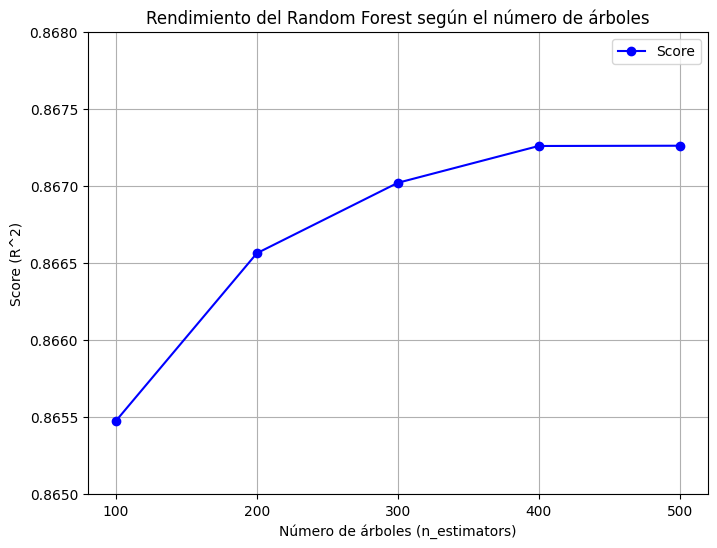

In [ ]:
# Lista de resultados obtenidos por cada n_estimators
scores = random_search.cv_results_['mean_test_score']
params = [100, 200, 300, 400, 500]

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.plot(params, scores, marker='o', linestyle='-', color='b', label='Score')
plt.title('Rendimiento del Random Forest según el número de árboles')
plt.xlabel('Número de árboles (n_estimators)')
plt.ylabel('Score (R^2)')
plt.grid(True)
plt.xticks(params)
plt.ylim(0.865, 0.868)
plt.legend()

Podemos observar que el error se estabiliza alrededor de los 300 estimadores, lo que indica que aumentar el número de estimadores no mejora los resultados significativamente. 

Por lo tanto, entrenaremos un modelo con estos hiperparámetros y evaluaremos su rendimiento en el conjunto de prueba, de la misma manera que con el modelo anterior.

In [ ]:
# Crear pipeline final con preprocesamiento y modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=73, n_estimators=300))
])

# Ajustar el modelo
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['Edad', 'ScoreCrediticio', 'CuantiaCredito', 'DuracionCredito',
       'NumeroPersonasDependientes', 'PagoMensualDeuda',
       'TasaUtilizacionTarjetaCredito', 'NumeroLineasCreditoAbiertas',
       'NumeroSolicitudesCredito', 'RatioDeudaIngresos',
       'Histori...
       'RatioTotalDeudaIngresos'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['SituacionLaboral', 'NivelEducativo', 'EstadoCivil', 'EstadoVivienda',
       'ObjetoCredito'],
      dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(n_estimators=300, random_state=73))])

In [ ]:
# Evaluar el modelo
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"R² del conjunto de train: {train_score:.4f}")
print(f"R² del conjunto de test: {test_score:.4f}")

y_pred = model.predict(X_test)

# Calcular otras métricas para regresión
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE de test: {rmse}")
print(f"MAE de test: {mae}")

R² del conjunto de train: 0.9824
R² del conjunto de test: 0.8676
RMSE de test: 2.8810710948148746
MAE de test: 1.7357042


En este caso, observamos una mejora leve frente a la regresión polinómica. Aunque el Random Forest Regressor ofrece un rendimiento superior, los resultados siguen sin ser óptimos.

## Ensemble: Boosting

Para nuestro análisis, compararemos tres modelos adicionales de ensamblaje: AdaBoostRegressor, GradientBoostingRegressor y HistGradientBoostingRegressor. La justificación para probar estos modelos radica en sus enfoques únicos para mejorar el rendimiento predictivo permitiendo capturar las no linealidades de nuestro conjunto de datos.

* **AdaBoostRegressor** ajusta una serie de modelos secuenciales, asignando mayor peso a las observaciones donde el error es alto, lo que permite corregir errores progresivamente.
* **GradientBoostingRegressor** optimiza el modelo mediante una suma de árboles de decisión que minimizan el error, capturando complejas relaciones no lineales y siendo efectivo en datos ruidosos.
* **HistGradientBoostingRegressor** aplica una estrategia basada en histogramas para dividir los datos, lo cual incrementa su eficiencia y escalabilidad, especialmente en conjuntos de datos grandes.

Al probar estos modelos con sus parámetros por defecto, podemos identificar rápidamente cuál se ajusta mejor a los datos, lo que nos permitirá decidir si alguno de ellos supera al Random Forest Regressor en rendimiento predictivo.

In [ ]:
# Pipeline para variables categóricas (Imputación + OneHotEncoder)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar con el valor más frecuente
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# Pipeline para variables numéricas (Imputación + Escalado)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar con la media
    ('scaler', PowerTransformer(method='yeo-johnson')), # Escalar debido a outliers
])

# Combinación de transformaciones para columnas categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
models = [AdaBoostRegressor(), GradientBoostingRegressor(), HistGradientBoostingRegressor()]

for regressor in models:
    # Crear pipeline final con preprocesamiento y modelo
    model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', regressor)
    ])

    # Definir la estrategia de validación cruzada con KFold
    kfold = KFold(n_splits=5, shuffle=True, random_state=73)

    # Usar cross_val_score para evaluar el modelo utilizando KFold
    results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')

    # Mostrar los resultados
    print(f'Accuracy promedio {model.named_steps['regressor']}: {results.mean()}')

Accuracy promedio AdaBoostRegressor(): 0.6227754501866463
Accuracy promedio GradientBoostingRegressor(): 0.866901944634825
Accuracy promedio HistGradientBoostingRegressor(): 0.895683426210711


Se puede observar que el _HistGradientBoostingRegressor()_ obtiene el mejor rendimiento. Además, este estimador tiene **soporte nativo para valores faltantes** (NaN), por lo que no sería necesario aplicar los imputadores en las Pipelines, y es mucho **más rápido** en conjuntos grandes de datos como el nuestro.

Veamos si el uso de los imputadores empeoraba o no el resultado:

In [ ]:
# Pipeline para variables categóricas sin imputado
categorical_transformer_no_imputer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline para variables numéricas sin imputado
numeric_transformer_no_imputer = Pipeline(steps=[
    ('scaler', PowerTransformer(method='yeo-johnson')),
])

# Combinación de transformaciones para columnas categóricas y numéricas
preprocessor_no_imputer = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_no_imputer, numeric_cols),
        ('cat', categorical_transformer_no_imputer, categorical_cols)
    ])

model_no_imputer = Pipeline(steps=[
    ('preprocessor', preprocessor_no_imputer),
    ('regressor', HistGradientBoostingRegressor())
    ])

# Usar cross_val_score para evaluar el modelo utilizando KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=73)
results = cross_val_score(model_no_imputer, X_train, y_train, cv=kfold, scoring='r2')
print(f'R^2 promedio: {results.mean()}')

R^2 promedio: 0.8962608529223239


Se comprueba que el uso de los imputadores da el mismo resultado.

De nuevo, realizaremos un RandomizedSearch para obtener los mejores **hiperparámetros**.

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor_no_imputer),
    ('regressor', HistGradientBoostingRegressor())
    ])

# Definir el espacio de búsqueda para RandomizedSearchCV
param_dist = {
    'regressor__loss': ['squared_error', 'absolute_error', 'poisson'],
    'regressor__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'regressor__max_iter': [100, 200, 300, 400, 500],
    'regressor__max_depth': [5, 10, 15, 20],
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    model,                                    # Pipeline
    param_distributions=param_dist,           # Hiperparámetros (espacio de búsqueda)
    verbose=1,                                # Mostrar progreso en la consola
    n_jobs=-1,                                # Usar todos los núcleos disponibles
    random_state=73                           # Reproducibilidad
)

random_search.fit(X_train, y_train)

# Mejores hiperparámetros y resultado asociado
print("Mejor puntaje de validación cruzada:", random_search.best_score_)
print("Mejores parámetros:", random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejor puntaje de validación cruzada: 0.899652411589714
Mejores parámetros: {'regressor__max_iter': 200, 'regressor__max_depth': 15, 'regressor__loss': 'poisson', 'regressor__learning_rate': 0.1}


In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor_no_imputer),
    ('regressor', HistGradientBoostingRegressor(max_depth=15, learning_rate=0.1, loss='poisson', max_iter=200))
    ])

# Ajustar el modelo
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   PowerTransformer())]),
                                                  Index(['Edad', 'ScoreCrediticio', 'CuantiaCredito', 'DuracionCredito',
       'NumeroPersonasDependientes', 'PagoMensualDeuda',
       'TasaUtilizacionTarjetaCredito', 'NumeroLineasCreditoAbiertas',
       'NumeroSolicitudesCredito', 'RatioDeudaIngresos',
       'Histo...
       'TipoInteresBase', 'TipoInteres', 'PagoMensualCredito',
       'RatioTotalDeudaIngresos'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['SituacionLaboral', 'NivelEducativo', 'EstadoCivil', 'EstadoVivienda',
       'ObjetoCredito'],
      dtype='object'))])),
                ('regressor',
                 HistGradientBoostingRegressor(loss='poisson', max_depth=15,
                                               max_iter=200))])

In [ ]:
# Evaluar el modelo
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"R² del conjunto de entrenamiento: {train_score:.4f}")
print(f"R² del conjunto de prueba: {test_score:.4f}")

y_pred = model.predict(X_test)

# Calcular otras métricas para regresión
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R² del conjunto de entrenamiento: 0.9320
R² del conjunto de prueba: 0.8993
RMSE: 2.513065877829
MAE: 1.6763178529437532


Observamos que este modelo mejora aún más los valores obtenidos anteriormente, lo que sugiere que el HistGradientBoostingRegressor es un modelo más adecuado para nuestro conjunto de datos que el Random Forest y, sobre todo, que la regresión lineal.

De manera adicional, nos gustaría probar el **Extreme Gradient Boosting**. 

XGBoost es una biblioteca separada de sklearn muy optimizada para _Gradient Boosting_, diseñada para ser altamente eficiente, flexible y portátil. Esto se debe a la utilización de métodos como el aprendizaje en paralelo o parámetros de regularización.

Ahora haremos un RandomizedSearch con sus numerosos parámetros. En total esta búsqueda contendría 3125 combinaciones, que sumado a la validación cruzada, en total se realizarían 15625 fits. Gracias al RandomizedSearch podemos acotar las iteraciones a 100 aleatorias, realizando 500 fits, que junto a la eficiencia del XGBoost resultará en un tiempo menor.

In [ ]:
# Crear pipeline final con preprocesamiento y modelo
model = Pipeline(steps=[
('preprocessor', preprocessor),
('regressor', xgb.XGBRegressor(tree_method="hist", random_state=73))
])

param_dist = {
    'regressor__n_estimators': [100, 200, 300, 500, 1000],   # Número de árboles
    'regressor__max_depth': [3, 5, 7, 9, 10],                # Profundidad máxima de los árboles
    'regressor__eta': [0.01, 0.05, 0.1, 0.2, 0.3],           # Tasa de aprendizaje (learning rate)
    'regressor__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],       # Fracción de muestras utilizadas en cada árbol
    'regressor__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0] # Fracción de columnas utilizadas en cada árbol
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    model,                                    # Pipeline
    param_distributions=param_dist,           # Hiperparámetros (espacio de búsqueda)
    n_iter=100,                               # Número de combinaciones aleatorias a probar
    verbose=1,                                # Mostrar progreso en la consola
    random_state=73                           # Reproducibilidad
)

random_search.fit(X_train, y_train)

# Mejores hiperparámetros y resultado asociado
print("Mejor puntaje de validación cruzada:", random_search.best_score_)
print("Mejores parámetros:", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejor puntaje de validación cruzada: 0.9036563817490212
Mejores parámetros: {'regressor__subsample': 0.7, 'regressor__n_estimators': 500, 'regressor__max_depth': 7, 'regressor__eta': 0.05, 'regressor__colsample_bytree': 0.9}


In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(tree_method="hist", random_state=73, subsample=0.7, n_estimators=500, max_depth=7, eta=0.05, colsample_bytree=0.9))
    ])

# Entrenar el modelo
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  Index(['Edad', 'ScoreCrediticio', 'CuantiaCredito', 'DuracionCredito',
       'NumeroPersonasDependientes', 'PagoMensualDeuda',
       'TasaUtilizacionTarjetaCredito', 'NumeroLineasCreditoAbiertas',
       'NumeroSolicitudesCredito'...
                              eval_metric=None, feature_types=None, gamma=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=500, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [ ]:
# Evaluar el modelo
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"R² del conjunto de entrenamiento: {train_score:.4f}")
print(f"R² del conjunto de prueba: {test_score:.4f}")

y_pred = model.predict(X_test)

# Calcular otras métricas para regresión
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R² del conjunto de entrenamiento: 0.9643
R² del conjunto de prueba: 0.9039
RMSE: 2.454827714048063
MAE: 1.587651873664856


No se ha encontrado una mejora muy significativa, pero si se ha conseguido un mejor resultado que con el HistGradientBoostingRegressor. Siendo hasta el momento el mejor modelo, con una gran eficiencia y rendimiento.

## MLP Regressor

Por último, buscando capturar esas no linealidades del conjunto de datos, probaremos con una red neuronal MLPRegressor (perceptrón multicapa). En ella, es necesario normalizar e imputar los valores faltantes.

In [ ]:
# Pipeline para variables categóricas (Imputación + OneHotEncoder)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar con el valor más frecuente
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# Pipeline para variables numéricas (Imputación + Escalado)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar con la media
    ('scaler', PowerTransformer(method='yeo-johnson')), # Escalar debido a outliers
])

# Combinación de transformaciones para columnas categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

De nuevo, realizaremos un RandomizedSearch para obtener los mejores **hiperparámetros**.

En este caso, usaremos **early stopping** en el MLP con un máximo de iteraciones de 1000. Gracias al early stopping, el RandomizedSearch se realizará en un tiempo mucho menor.

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor())
    ])

# Configurar RandomizedSearchCV
param_dist = {
    'regressor__hidden_layer_sizes': [(64,), (128,), (64, 32), (128, 64), (128, 64, 32)],
    'regressor__activation': ['tanh', 'relu'],
    'regressor__solver': ['adam', 'sgd'],
    'regressor__max_iter': [1000],
    'regressor__early_stopping': [True],
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    model,                                    # Pipeline
    param_distributions=param_dist,           # Hiperparámetros (espacio de búsqueda)
    verbose=1,                                # Mostrar progreso en la consola
    n_jobs=-1,                                # Usar todos los núcleos disponibles
    random_state=73                           # Reproducibilidad
)

random_search.fit(X_train, y_train)

# Mejores hiperparámetros y resultado asociado
print("Mejor puntaje de validación cruzada:", random_search.best_score_)
print("Mejores parámetros:", random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejor puntaje de validación cruzada: 0.917284877357212
Mejores parámetros: {'regressor__solver': 'sgd', 'regressor__max_iter': 1000, 'regressor__hidden_layer_sizes': (64,), 'regressor__early_stopping': True, 'regressor__activation': 'tanh'}


Podemos comprobar que se obtiene un R^2 score de casi 0.92 con los mejores hiperparámetros.

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(solver='sgd', hidden_layer_sizes=(64,), activation='tanh', max_iter=1000, early_stopping=True))
    ])

# Entrenar el modelo
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  Index(['Edad', 'ScoreCrediticio', 'CuantiaCredito', 'DuracionCredito',
       'NumeroPersonasDependientes', 'PagoMensualDeuda',
       'TasaUtilizacionTarjetaCredito', 'NumeroLineasCreditoAbiertas',
       'NumeroSolicitudesCredito'...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['SituacionLaboral', 'NivelEducativo', 'EstadoCivil', 'EstadoVivienda',
       'ObjetoCredito'],
      dtype='object'))])),
                ('regressor',
                 MLPRegressor(activation='tanh', early_stopping=True,
                              hidden_layer_sizes=(64,), max_iter=1000,
                              solver='sgd'))])

In [ ]:
# Evaluar el modelo
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"R² del conjunto de entrenamiento: {train_score:.4f}")
print(f"R² del conjunto de prueba: {test_score:.4f}")

y_pred = model.predict(X_test)

# Calcular otras métricas para regresión
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R² del conjunto de entrenamiento: 0.9277
R² del conjunto de prueba: 0.9175
RMSE: 2.275213676151055
MAE: 1.5003742206956177


Se puede observar que el MLPRegressor supera a todos los modelos anteriores, incluido el XGBoost. Esto se debe a la capacidad de las redes neuronales para capturar relaciones no lineales y patrones complejos en los datos, lo que les permite adaptarse mejor a la estructura subyacente del conjunto de datos.

## Ensemble: Voting Regressor

Para terminar, usaremos un modelo _VotingRegressor()_ con los tres mejores modelos obtenidos, dando como resultado el promedio de las predicciones individuales de cada modelo para formar una predicción final. ¿Podría ocurrir que el Boosting ayude en algunos casos?

In [ ]:
# Pipeline para variables categóricas (Imputación + OneHotEncoder)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# Pipeline para variables numéricas (Imputación + Escalado)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', PowerTransformer(method='yeo-johnson')),
])

# Combinación de transformaciones para columnas categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

Se incluyen ahora los tres mejores regresores obtenidos hasta ahora:
- MLPRegressor
- XGBRegressor
- HistGradientBoostingRegressor

In [ ]:
regressor1 = MLPRegressor(solver='sgd', hidden_layer_sizes=(64,), activation='tanh', max_iter=1000, early_stopping=True)
regressor2 = xgb.XGBRegressor(tree_method="hist", random_state=73, subsample=0.7, n_estimators=500, max_depth=5, eta=0.05, colsample_bytree=0.8)
regressor3 = HistGradientBoostingRegressor(max_depth=15, learning_rate=0.1, loss='poisson', max_iter=200)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', VotingRegressor([('mlp', regressor1), ('xgb', regressor2), ('hgb', regressor3)]))
    ])

# Usar cross_val_score para evaluar el modelo utilizando KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=73)
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
print(f'R^2 promedio: {results.mean()}')

R^2 promedio: 0.9198916436200054


In [ ]:
regressor1 = MLPRegressor(solver='sgd', hidden_layer_sizes=(64,), activation='tanh', max_iter=1000, early_stopping=True)
regressor2 = xgb.XGBRegressor(tree_method="hist", random_state=73, subsample=0.7, n_estimators=500, max_depth=5, eta=0.05, colsample_bytree=0.8)
regressor3 = HistGradientBoostingRegressor(max_depth=15, learning_rate=0.1, loss='poisson', max_iter=200)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', VotingRegressor([('mlp', regressor1), ('xgb', regressor2), ('hgb', regressor3)]))
    ])

# Entrenar el modelo
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  Index(['Edad', 'ScoreCrediticio', 'CuantiaCredito', 'DuracionCredito',
       'NumeroPersonasDependientes', 'PagoMensualDeuda',
       'TasaUtilizacionTarjetaCredito', 'NumeroLineasCreditoAbiertas',
       'NumeroSolicitudesCredito'...
                                                           interaction_constraints=None,
                                                           learning_rate=None,
                                                           max_bin=None,
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=5,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=500,
                                                           n_jobs=None,
                                                           num_parallel_tree=None, ...)),
                                             ('hgb',
                                              HistGradientBoostingRegressor(loss='poisson',
                                                                            max_depth=15,
                                                                            max_iter=200))]))])

In [ ]:
# Evaluar el modelo
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"R² del conjunto de entrenamiento: {train_score:.4f}")
print(f"R² del conjunto de prueba: {test_score:.4f}")

y_pred = model.predict(X_test)

# Calcular otras métricas para regresión
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R² del conjunto de entrenamiento: 0.9384
R² del conjunto de prueba: 0.9173
RMSE: 2.277427543664389
MAE: 1.4730628971646536


El resultado es similar al obtenido utilizando únicamente el MLP.

También haremos una última prueba usando 10 MLPs. En otras palabras, vamos a probar 10 instancias del modelo que mejores resultados ha devuelto para observar si el promedio de sus decisiones nos da mejores resultados. De esta manera, reducimos su variabilidad al disminuir el efecto de la aleatoriedad de las MLPs.

In [ ]:
regressor1 = MLPRegressor(solver='sgd', hidden_layer_sizes=(64,), activation='tanh', max_iter=1000, early_stopping=True)
regressor2 = MLPRegressor(solver='sgd', hidden_layer_sizes=(64,), activation='tanh', max_iter=1000, early_stopping=True)
regressor3 = MLPRegressor(solver='sgd', hidden_layer_sizes=(64,), activation='tanh', max_iter=1000, early_stopping=True)
regressor4 = MLPRegressor(solver='sgd', hidden_layer_sizes=(64,), activation='tanh', max_iter=1000, early_stopping=True)
regressor5 = MLPRegressor(solver='sgd', hidden_layer_sizes=(64,), activation='tanh', max_iter=1000, early_stopping=True)
regressor6 = MLPRegressor(solver='sgd', hidden_layer_sizes=(64,), activation='tanh', max_iter=1000, early_stopping=True)
regressor7 = MLPRegressor(solver='sgd', hidden_layer_sizes=(64,), activation='tanh', max_iter=1000, early_stopping=True)
regressor8 = MLPRegressor(solver='sgd', hidden_layer_sizes=(64,), activation='tanh', max_iter=1000, early_stopping=True)
regressor9 = MLPRegressor(solver='sgd', hidden_layer_sizes=(64,), activation='tanh', max_iter=1000, early_stopping=True)
regressor10 = MLPRegressor(solver='sgd', hidden_layer_sizes=(64,), activation='tanh', max_iter=1000, early_stopping=True)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', VotingRegressor([('mlp1', regressor1),('mlp2', regressor2),('mlp3', regressor3), ('mlp4', regressor4),('mlp5', regressor5),('mlp6', regressor6),('mlp7', regressor7),('mlp8', regressor8),('mlp9', regressor9),('mlp10', regressor10)]))
    ])

# Usar cross_val_score para evaluar el modelo utilizando KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=73)
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
print(f'R^2 promedio: {results.mean()}')

R^2 promedio: 0.9210684525335268


In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', VotingRegressor([('mlp1', regressor1),('mlp2', regressor2),('mlp3', regressor3), ('mlp4', regressor4),('mlp5', regressor5),('mlp6', regressor6),('mlp7', regressor7),('mlp8', regressor8),('mlp9', regressor9),('mlp10', regressor10)]))
    ])

# Entrenar el modelo
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  Index(['Edad', 'ScoreCrediticio', 'CuantiaCredito', 'DuracionCredito',
       'NumeroPersonasDependientes', 'PagoMensualDeuda',
       'TasaUtilizacionTarjetaCredito', 'NumeroLineasCreditoAbiertas',
       'NumeroSolicitudesCredito'...
                                                           solver='sgd')),
                                             ('mlp8',
                                              MLPRegressor(activation='tanh',
                                                           early_stopping=True,
                                                           hidden_layer_sizes=(64,),
                                                           max_iter=1000,
                                                           solver='sgd')),
                                             ('mlp9',
                                              MLPRegressor(activation='tanh',
                                                           early_stopping=True,
                                                           hidden_layer_sizes=(64,),
                                                           max_iter=1000,
                                                           solver='sgd')),
                                             ('mlp10',
                                              MLPRegressor(activation='tanh',
                                                           early_stopping=True,
                                                           hidden_layer_sizes=(64,),
                                                           max_iter=1000,
                                                           solver='sgd'))]))])

In [ ]:
# Evaluar el modelo
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"R² del conjunto de entrenamiento: {train_score:.4f}")
print(f"R² del conjunto de prueba: {test_score:.4f}")

y_pred = model.predict(X_test)

# Calcular otras métricas para regresión
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R² del conjunto de entrenamiento: 0.9309
R² del conjunto de prueba: 0.9215
RMSE: 2.218880467373268
MAE: 1.423668706546837


La mejora ha sido muy leve con este _VotingRegressor()_ a costa de emplear muchos más recursos y tiempo.

## Ensemble: Bagging

Como hemos visto, combinar varios MLP puede ser productivo. Al usar el mismo modelo en todas las instancias, es más típico utilizar _BaggingRegressor()_, que también devolverá la media de las predicciones, aunque incluye algunas técnicas durante el entrenamiento como el bootstrapping que pueden reducir aún más la varianza.

Es por ello que haremos una prueba final con un **Bagging** de **25 regresores MLP**.

In [ ]:
# Pipeline para variables categóricas (Imputación + OneHotEncoder)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# Pipeline para variables numéricas (Imputación + Escalado)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', PowerTransformer(method='yeo-johnson')),
])

# Combinación de transformaciones para columnas categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
regression = MLPRegressor(solver='adam', hidden_layer_sizes=(64,32), activation='tanh', max_iter=1000, early_stopping=True)

# Crear pipeline final con preprocesamiento y modelo
model = Pipeline(steps=[
('preprocessor', preprocessor),
('regressor', BaggingRegressor(estimator=regression, n_estimators=25, random_state=42, n_jobs=-1))
])

In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  Index(['Edad', 'ScoreCrediticio', 'CuantiaCredito', 'DuracionCredito',
       'NumeroPersonasDependientes', 'PagoMensualDeuda',
       'TasaUtilizacionTarjetaCredito', 'NumeroLineasCreditoAbiertas',
       'NumeroSolicitudesCredito'...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['SituacionLaboral', 'NivelEducativo', 'EstadoCivil', 'EstadoVivienda',
       'ObjetoCredito'],
      dtype='object'))])),
                ('regressor',
                 BaggingRegressor(estimator=MLPRegressor(activation='tanh',
                                                         early_stopping=True,
                                                         hidden_layer_sizes=(64,
                                                                             32),
                                                         max_iter=1000),
                                  n_estimators=25, n_jobs=-1,
                                  random_state=42))])

In [ ]:
# Evaluar el modelo
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"R² del conjunto de entrenamiento: {train_score:.4f}")
print(f"R² del conjunto de prueba: {test_score:.4f}")

y_pred = model.predict(X_test)

# Calcular otras métricas para regresión
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R² del conjunto de entrenamiento: 0.9601
R² del conjunto de prueba: 0.9262
RMSE: 2.150671180660725
MAE: 1.2622474581842567


Observamos que el tiempo necesario es alto, aunque se puede reducir incluyendo _n-jobs = -1_ para usar todos los procesadores. No obstante, el **resultado** es el **mejor** hasta ahora, superando el R^2 score de 0.925. Aunque donde má destaca es en el **MAE**, que es el más bajo obtenido hasta ahora con mucha diferencia. El VotingRegressor con 10 MLPs tenía un MAE de 1.42, mientras que el Bagging de 25 MLPs tiene un MAE de 1.26.

## Competición

De esta forma, el modelo elegido fue el _BaggingRegressor()_ que utiliza 25 MLPs al presentar las mejores métricas, a pesar de ser el más pesado de entrenar computacionalmente. Sin embargo, al ser una competición, se ha preferido un mejor resultado frente a un rendimiento considerablemente peor.

Una vez encontramos el mejor modelo, se ha decidido entrenar con todo el conjunto de datos (50.000 datos). 

Utilizaremos validación cruzada con 10 folds para estimar el error y comprobar que el modelo no está sobreajustado y se mantienen los resultados obtenidos.

In [ ]:
# Pipeline para variables categóricas (Imputación + OneHotEncoder)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar con el valor más frecuente
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# Pipeline para variables numéricas (Imputación + Escalado)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar con la media
    ('scaler', PowerTransformer(method='yeo-johnson')), # Escalar debido a outliers
])

# Combinación de transformaciones para columnas categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
regression = MLPRegressor(solver='adam', hidden_layer_sizes=(64,32), activation='tanh', max_iter=1000, early_stopping=True)

# Crear pipeline final con preprocesamiento y modelo
model = Pipeline(steps=[
('preprocessor', preprocessor),
('regressor', BaggingRegressor(estimator=regression, n_estimators=25, random_state=42, n_jobs=-1))
])

# Usar cross_val_score para evaluar el modelo utilizando KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=73)
results = cross_val_score(model, X, y, cv=kfold, scoring='r2', n_jobs=-1)
print(f'R^2 promedio: {results.mean()}')

R^2 promedio: 0.9270970809960595


Observamos que no sobreajusta, por lo que guardamos este modelo para la competición por ser el mejor. Para ello utilizamos la librería joblib.

In [ ]:
regression = MLPRegressor(solver='adam', hidden_layer_sizes=(64,32), activation='tanh', max_iter=1000, early_stopping=True)

# Crear pipeline final con preprocesamiento y modelo
model = Pipeline(steps=[
('preprocessor', preprocessor),
('regressor', BaggingRegressor(estimator=regression, n_estimators=25, random_state=42, n_jobs=-1))
])

# Entrenar el modelo
model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  Index(['Edad', 'ScoreCrediticio', 'CuantiaCredito', 'DuracionCredito',
       'NumeroPersonasDependientes', 'PagoMensualDeuda',
       'TasaUtilizacionTarjetaCredito', 'NumeroLineasCreditoAbiertas',
       'NumeroSolicitudesCredito'...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['SituacionLaboral', 'NivelEducativo', 'EstadoCivil', 'EstadoVivienda',
       'ObjetoCredito'],
      dtype='object'))])),
                ('regressor',
                 BaggingRegressor(estimator=MLPRegressor(activation='tanh',
                                                         early_stopping=True,
                                                         hidden_layer_sizes=(64,
                                                                             32),
                                                         max_iter=1000),
                                  n_estimators=25, n_jobs=-1,
                                  random_state=42))])

In [ ]:
import joblib

# Guardar el modelo
joblib.dump(model, '../../model/model_regression.pkl')

['../../model/model_regression.pkl']

## Conclusiones Regresión

Como conclusión, se mostrarán gráficos de cómo ha ido mejorando el rendimiento a lo largo de las pruebas en los diferentes modelos probados.

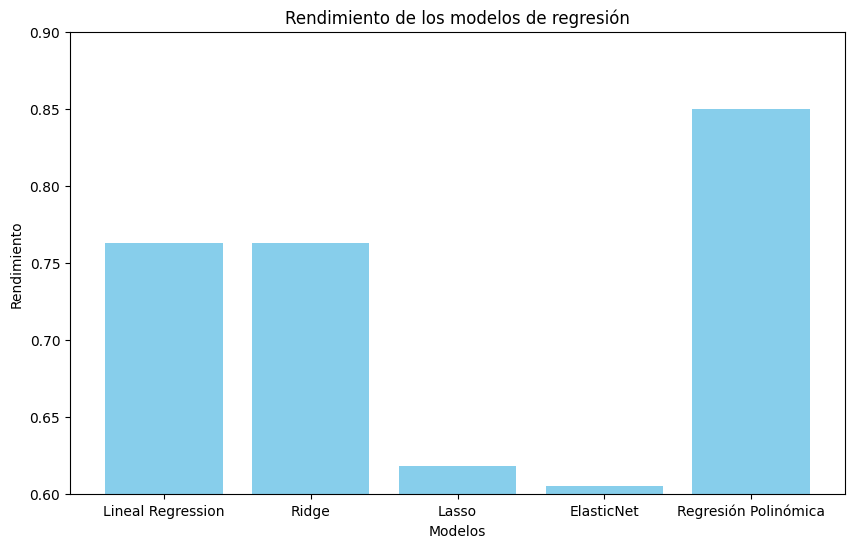

In [ ]:
# Para la comparación de los modelos de Regresión Lineal

# Lista de resultados de los modelos (rendimientos)
resultados = [0.7629,0.7629,0.6182,0.6051,0.85]  # ejemplo de rendimientos

# Lista de nombres de los modelos
nombres_modelos = ["Lineal Regression", "Ridge", "Lasso", "ElasticNet", "Regresión Polinómica"]

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))
plt.ylim(0.6, 0.9)  # Limitar el rango del eje Y para que no se escale automáticamente

# Dibujar el histograma con los modelos acumulados
plt.bar(nombres_modelos[:], resultados[:], color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Modelos')
plt.ylabel('Rendimiento')
plt.title('Rendimiento de los modelos de regresión')

# Mostrar el gráfico
plt.show()


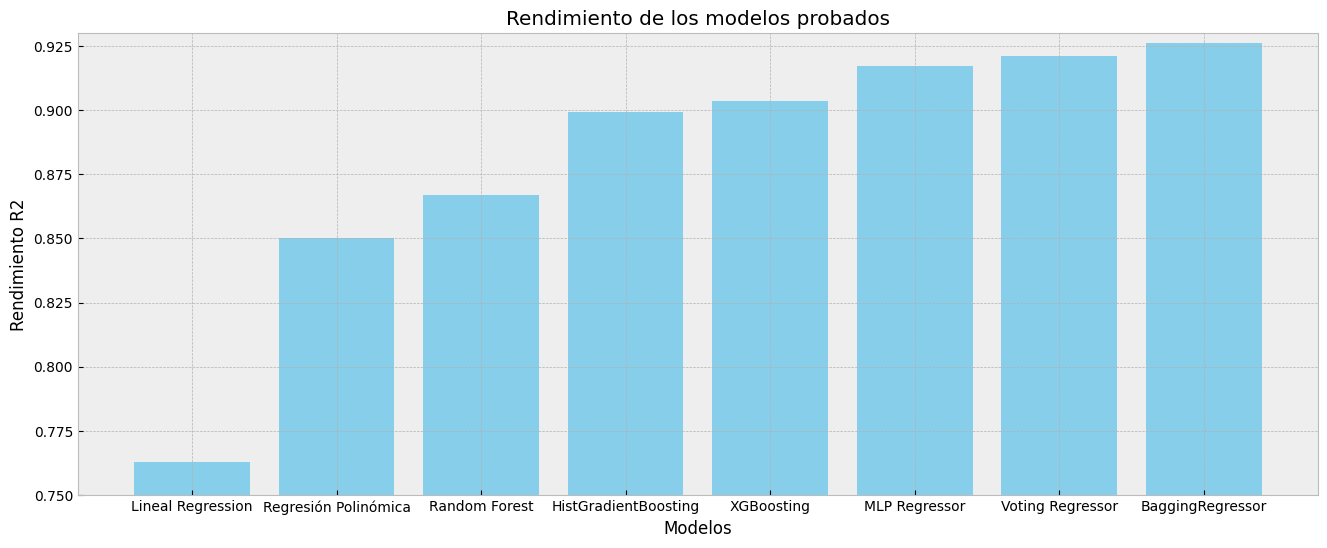

In [9]:
# Para la comparación de todos los modelos

# Lista de resultados de los modelos (rendimientos)
resultados = [0.7629, 0.85, 0.867, 0.8993, 0.9037, 0.9173, 0.9211, 0.9262]  # ejemplo de rendimientos

# Lista de nombres de los modelos
nombres_modelos = ["Lineal Regression", "Regresión Polinómica", "Random Forest", "HistGradientBoosting", "XGBoosting", "MLP Regressor", "Voting Regressor", "BaggingRegressor"]

# Crear la figura y los ejes
plt.figure(figsize=(16, 6))
plt.ylim(0.75, 0.93)  # Limitar el rango del eje Y para que no se escale automáticamente

# Dibujar el histograma con los modelos acumulados
plt.bar(nombres_modelos, resultados, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Modelos')
plt.ylabel('Rendimiento R2')
plt.title('Rendimiento de los modelos probados')

# Mostrar el gráfico
plt.show()


A pesar de ser el más pesado computacionalmente, el **mejor rendimiento** se obtiene con el **Bagging Regressor**, es por ello que se utilizará en la competición. Sin embargo, si el objetivo fuese distinto, quizás sería una buena opción utilizar **XGBoost**, al obtener un rendimiento muy similar (diferencia menor a 0.02) pero con un entrenamiento mucho **más rápido**.

# Clasificación

## Imports

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
import xgboost as xgb

import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, VotingClassifier

from sklearn.metrics import roc_auc_score, accuracy_score

## Preparación de Datos para Clasificación

In [ ]:
# Leer el CSV
data = pd.read_csv('../../data/EstudioCrediticio_TrainP.csv')

# Eliminar la primera columna
data = data.iloc[:, 1:]

# Eliminar la última columna
data = data.iloc[:, :-1]

# Eliminar las columnas altamente correlacionadas
data = data.drop(['IngresoBrutoAnual', 'Experiencia', 'TotalActivos'], axis=1)

# Separar las características (X) y la variable a predecir (y)
X = data.iloc[:, :-1]  # Todas las columnas menos la última
y = data.iloc[:, -1]   # La última columna

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identificar columnas numéricas y categóricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

## KNeighbors Classifier

### Creación de Pipelines

Se crearán las siguientes Pipelines para el preprocesado de los datos:
- En las variables categóricas, se aplicará un imputado basado en la moda y un OneHotEncoder para conseguir arrays numéricos
- En las variables numéricas, se aplicará un imputado basado en la media y se escalarán las variables con PowerTransformer, que aplica una transformación de potencia para hacer que los datos sean más gaussianos, reduciendo el impacto de los outliers. Se usará el método yeo-johnson al tener valores positivos y negativos.

In [ ]:
# Pipeline para variables categóricas (Imputación + OneHotEncoder)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar con el valor más frecuente
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline para variables numéricas (Imputación + Escalado)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar con la media
    ('scaler', PowerTransformer(method='yeo-johnson')), # Escalar debido a outliers
])

# Combinación de transformaciones para columnas categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Crear pipeline final con preprocesamiento y modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=20)),  # Aplicar PCA a todas las variables preprocesadas
    ('classifier', KNeighborsClassifier())
])

Para utilizar el _KNeighborsClassifier()_, hemos empleado un PCA para reducir el número de parámetros y facilitar el entrenamiento del modelo.

### Búsqueda de hiperparámetros

Se realizará un Randomized Search para encontrar los **mejores hiperparámetros** para nuestro RandomForest.

En este caso, la búsqueda será muy lenta, y el hiperparámetro que nos interesa conocer el número de estimadores (árboles de decisión) que utilizará el random forest.

**GridSearch VS Randomized Search**: 
La diferencia radice en el tiempo de ejecución. En caso de que haya demasiados modelos que probar, el randomized search entrenará sólo unos pocos de estos modelos de manera aleatoria. El resultado es bastante similar, mientras que el tiempo de ejecución de la búsqueda aleatoria es drásticamente menor. Además, ambos utilizan por defecto **validación cruzada** de 5 folds.

In [ ]:
# Definir el espacio de búsqueda para RandomizedSearchCV
param_dist = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 21, 31, 41, 51],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__leaf_size': [10, 20, 30, 40, 50],
}

# Configurar RandomizedSearchCV, por defecto usa 5-stratified StratifiedKFold
random_search = RandomizedSearchCV(
    model,                                    # Pipeline
    param_distributions=param_dist,           # Hiperparámetros (espacio de búsqueda)
    verbose=1,                                # Mostrar progreso en la consola
    n_jobs=-1,                                # Usar todos los núcleos disponibles
    random_state=73,                          # Reproducibilidad
    n_iter=50                                 # Número de combinaciones a probar
)

random_search.fit(X_train, y_train)

# Mejores hiperparámetros
print("Mejores parámetros:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores parámetros: {'classifier__weights': 'distance', 'classifier__n_neighbors': 41, 'classifier__leaf_size': 10}


Por ello, entrenaremos el modelo con los mejores hiperparámetros y observaremos su rendimiento en test de la misma forma que en el modelo anterior.

In [ ]:
# Crear pipeline final con preprocesamiento y modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=20)),  # Aplicar PCA a todas las variables preprocesadas
    ('classifier', KNeighborsClassifier(weights='distance', n_neighbors=41, leaf_size=10))
])

# Ajustar el modelo
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  Index(['Edad', 'ScoreCrediticio', 'CuantiaCredito', 'DuracionCredito',
       'NumeroPersonasDependientes', 'PagoMensualDeuda',
       'TasaUtilizacionTarjetaCredito', 'NumeroLineasCreditoAbiertas',
       'NumeroSolicitudesCredito'...
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['SituacionLaboral', 'NivelEducativo', 'EstadoCivil', 'EstadoVivienda',
       'ObjetoCredito'],
      dtype='object'))])),
                ('pca', PCA(n_components=20)),
                ('classifier',
                 KNeighborsClassifier(leaf_size=10, n_neighbors=41,
                                      weights='distance'))])

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular métricas para clasificación
rocauc_train = roc_auc_score(y_train, y_train_pred)
rocauc_test = roc_auc_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"AUC ROC del conjunto train: {rocauc_train}")
print(f"AUC ROC del conjunto test: {rocauc_test}")
print(f"Accuracy del conjunto train: {accuracy_train}")
print(f"Accuracy del conjunto test: {accuracy_test}")

AUC ROC del conjunto train: 1.0
AUC ROC del conjunto test: 0.8297376836669855
Accuracy del conjunto train: 1.0
Accuracy del conjunto test: 0.8843


## Linear Classifiers

Se desarrollarán las pipelines utilizando el mismo enfoque que en el modelo anterior.

In [ ]:
# Pipeline para variables categóricas (Imputación + OneHotEncoder)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar con el valor más frecuente
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline para variables numéricas (Imputación + Escalado)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar con la media
    ('scaler', PowerTransformer(method='yeo-johnson')), # Escalar debido a outliers
])

# Combinación de transformaciones para columnas categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

En primer lugar, nos preguntamos: ¿Cuál es el **mejor modelo de clasificación Lineal**?

Se usará una Pipeline final que une el **preprocesamiento** de datos con el **clasificador**, y posteriormente se realizará **validación cruzada** para comprobar que modelo de regresión lineal da mejor rendimiento. Se probará con _LogisticRegression()_, _RidgeClassifier()_ que incluye penalización L2, _SGDClassifier()_ que incluye penalizaciones L1, L2 y ElasticNet, y _Perceptron()_ que incluye también las tres penalizaciones.

In [ ]:
models = [LogisticRegression(), RidgeClassifier(), SGDClassifier(), Perceptron()]

for classifier in models:
    # Crear pipeline final con preprocesamiento y modelo
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    # Definir la estrategia de validación cruzada con StratifiedKFold
    stratifiedKFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=73)



    # Usar cross_val_score para evaluar el modelo utilizando StratifiedKFold
    roc_auc = cross_val_score(model, X_train, y_train, cv=stratifiedKFold, scoring='accuracy')

    # Mostrar los resultados
    print(f'Accuracy promedio {model.named_steps['classifier']}: {roc_auc.mean()}')

Accuracy promedio LogisticRegression(): 0.936375
Accuracy promedio RidgeClassifier(): 0.9346249999999999
Accuracy promedio SGDClassifier(): 0.93125
Accuracy promedio Perceptron(): 0.9013250000000002


Se observa que la Regresión Logística, RidgeClassifier y SGDClassifier ofrecen un rendimiento similar y funcionan mejor en nuestro conjunto de datos. No obstante, los resultados obtenidos no son demasiado buenos.

### Evaluación del modelo

También queremos obtener métricas como la precisión o el área debajo de la curva ROC.

Para ello, dividimos el conjunto de datos en train y test, entranamos y evaluamos.

Usaremos en este caso la Regresión Logística:

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Entrenar el modelo
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  Index(['Edad', 'IngresoBrutoAnual', 'ScoreCrediticio', 'Experiencia',
       'CuantiaCredito', 'DuracionCredito', 'NumeroPersonasDependientes',
       'PagoMensualDeuda', 'TasaUtilizacionTarjetaCredito',
       'NumeroLineasCreditoAb...
       'TipoInteres', 'PagoMensualCredito', 'RatioTotalDeudaIngresos'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['SituacionLaboral', 'NivelEducativo', 'EstadoCivil', 'EstadoVivienda',
       'ObjetoCredito'],
      dtype='object'))])),
                ('classifier', LogisticRegression())])

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular métricas para clasificación
rocauc_train = roc_auc_score(y_train, y_train_pred)
rocauc_test = roc_auc_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"AUC ROC del conjunto train: {rocauc_train}")
print(f"AUC ROC del conjunto test: {rocauc_test}")
print(f"Accuracy del conjunto train: {accuracy_train}")
print(f"Accuracy del conjunto test: {accuracy_test}")

AUC ROC del conjunto train: 0.9222149043250281
AUC ROC del conjunto test: 0.9248945731622107
Accuracy del conjunto train: 0.9369
Accuracy del conjunto test: 0.9401


Se desarrollarán las pipelines utilizando el mismo enfoque que en el modelo anterior.

## Ensembles: Bagging, RandomForests y Boosting

Vamos a probar ensembles de tipo bagging (BaggingClassifier), random forests (RandomForestClassifier y ExtraTreesClassifier) y boosting (AdaBoostClassifier, GradientBoostingClassifier y HistGradientBoostingClassifier). Veamos qué tal funcionan con los valores por defecto para descartar los modelos menos capaces.

In [ ]:
# Pipeline para variables categóricas (Imputación + OneHotEncoder)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar con el valor más frecuente
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# Pipeline para variables numéricas (Imputación + Escalado)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar con la media
    ('scaler', PowerTransformer(method='yeo-johnson')), # Escalar debido a outliers
])

# Combinación de transformaciones para columnas categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
models = [BaggingClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), AdaBoostClassifier(algorithm='SAMME'), GradientBoostingClassifier(), HistGradientBoostingClassifier()]

for classifier in models:
    # Crear pipeline final con preprocesamiento y modelo
    model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
    ])

    # Definir la estrategia de validación cruzada con StratifiedKFold
    stratifiedKFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=73)

    # Usar cross_val_score para evaluar el modelo utilizando StratifiedKFold
    accuracy = cross_val_score(model, X, y, cv=stratifiedKFold, scoring='accuracy')

    # Mostrar los resultados
    print(f'Accuracy promedio {model.named_steps['classifier']}: {accuracy.mean()}')

Accuracy promedio BaggingClassifier(): 0.91264
Accuracy promedio RandomForestClassifier(): 0.9158799999999999
Accuracy promedio ExtraTreesClassifier(): 0.9126


c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boos

Accuracy promedio AdaBoostClassifier(): 0.9324200000000001
Accuracy promedio GradientBoostingClassifier(): 0.93112
Accuracy promedio HistGradientBoostingClassifier(): 0.9450199999999999


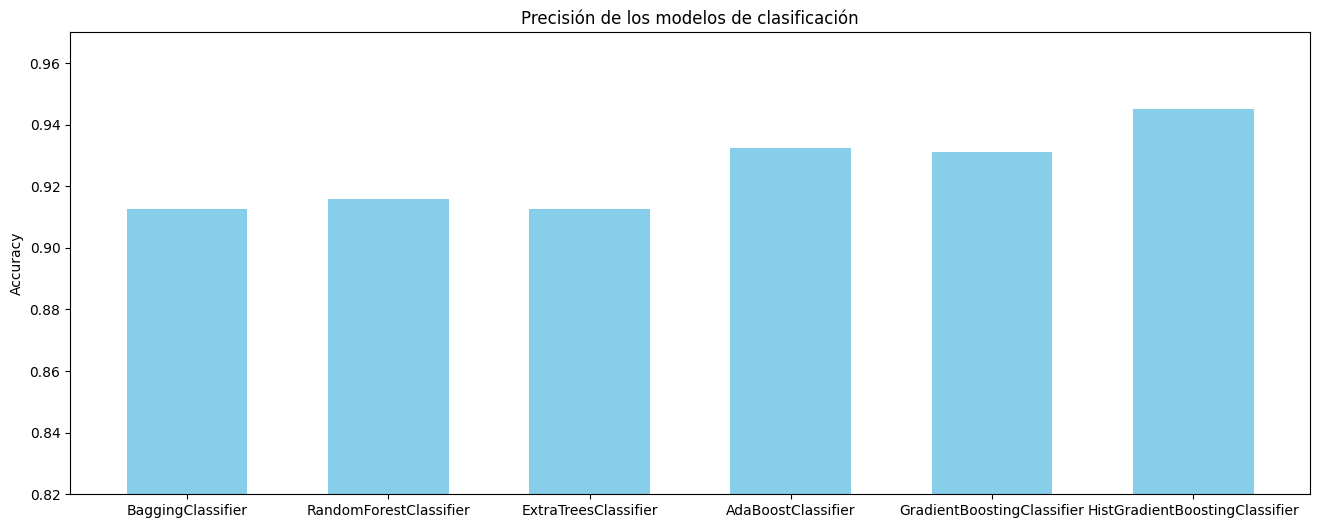

In [ ]:
# Lista de resultados de los modelos (AUC ROC)
resultados = [0.9126, 0.9158, 0.9126, 0.9324, 0.9311, 0.9450]  # ejemplo de rendimientos

# Lista de nombres de los modelos
nombres_modelos = ["BaggingClassifier", "RandomForestClassifier", "ExtraTreesClassifier", "AdaBoostClassifier", "GradientBoostingClassifier", "HistGradientBoostingClassifier"]

# Crear la figura y los ejes
plt.figure(figsize=(16, 6))
plt.ylim(0.82, 0.97)  # Limitar el rango del eje Y para que no se escale automáticamente

# Dibujar el histograma con los modelos acumulados
plt.bar(nombres_modelos, resultados, color='skyblue', width=0.6)

# Añadir etiquetas y título
plt.ylabel('Accuracy')
plt.title('Precisión de los modelos de clasificación')

# Mostrar el gráfico
plt.show()

Se puede observar que el _HistGradientBoostingRegressor()_ obtiene el mejor rendimiento con cierto margen. Además, este estimador tiene **soporte nativo para valores faltantes** (NaN), por lo que no sería necesario aplicar los imputadores en las Pipelines, y es **mucho más rápido** en conjuntos grandes de datos como el nuestro.

Por ello, vamos a continuar utilizando sólamente el clasificador _HistGradientBoostingClassifier()_.

### Histogram-based Gradient Boosting

Ya que el _HistGradientBoostingClassifier()_ incluye soporte nativo para valores nulos, vamos a ver su rendimiento sin imputadores:

In [ ]:
# Pipeline para variables categóricas
categorical_transformer_no_imputer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline para variables numéricas
numeric_transformer_no_imputer = Pipeline(steps=[
    ('scaler', PowerTransformer(method='yeo-johnson')),
])

# Combinación de transformaciones para columnas categóricas y numéricas
preprocessor_no_imputer = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_no_imputer, numeric_cols),
        ('cat', categorical_transformer_no_imputer, categorical_cols)
    ])

# Modelo
model_no_imputer = Pipeline(steps=[
    ('preprocessor', preprocessor_no_imputer),
    ('classifier', HistGradientBoostingClassifier())
])

stratifiedKFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=73)

# Usar cross_val_score para evaluar el modelo utilizando StratifiedKFold
accuracy = cross_val_score(model_no_imputer, X, y, cv=stratifiedKFold, scoring='accuracy')

# Mostrar los resultados
print(f'Accuracy promedio {model_no_imputer.named_steps['classifier']}: {accuracy.mean()}')

Accuracy promedio HistGradientBoostingClassifier(): 0.94628


Se comprueba que con el uso de los imputadores se obtiene prácticamente el mismo resultado, por lo que no vamos a utilizarlos para simplificar el modelo.

De nuevo, realizaremos un RandomizedSearch para obtener los mejores **hiperparámetros**, empleando cross-validation con 5 folds.

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', HistGradientBoostingClassifier())
])

# Definir el espacio de búsqueda para RandomizedSearchCV
param_dist = {
    'classifier__learning_rate': [0.01, 0.033, 0.1, 0.33],
    'classifier__max_iter': [100, 200, 300, 400, 500, 600, 800, 1000],
    'classifier__max_depth': [5, 10, 20],
}

# Configurar RandomizedSearchCV, por defecto usa 5-stratified StratifiedKFold
random_search = RandomizedSearchCV(
    model,                                    # Pipeline
    param_distributions=param_dist,           # Hiperparámetros (espacio de búsqueda)
    verbose=1,                                # Mostrar progreso en la consola
    n_jobs=-1,                                # Usar todos los núcleos disponibles
    random_state=73                           # Reproducibilidad
)

random_search.fit(X_train, y_train)

# Mejores hiperparámetros
print("Mejores parámetros:", random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores parámetros: {'classifier__max_iter': 600, 'classifier__max_depth': 20, 'classifier__learning_rate': 0.033}


Ahora vamos a entrenar el modelo con los mejores parámetros, y a analizar su rendimiento tanto en el conjunto de train como en el de test.

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', HistGradientBoostingClassifier(max_iter=600, max_depth=20, learning_rate=0.033))
])

# Ajustar el modelo
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  Index(['Edad', 'ScoreCrediticio', 'CuantiaCredito', 'DuracionCredito',
       'NumeroPersonasDependientes', 'PagoMensualDeuda',
       'TasaUtilizacionTarjetaCredito', 'NumeroLineasCreditoAbiertas',
       'NumeroSolicitudesCredito'...
       'RatioTotalDeudaIngresos'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['SituacionLaboral', 'NivelEducativo', 'EstadoCivil', 'EstadoVivienda',
       'ObjetoCredito'],
      dtype='object'))])),
                ('regressor',
                 HistGradientBoostingClassifier(learning_rate=0.033,
                                                max_depth=20, max_iter=600))])

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular métricas para clasificación
rocauc_train = roc_auc_score(y_train, y_train_pred)
rocauc_test = roc_auc_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"AUC ROC del conjunto train: {rocauc_train}")
print(f"AUC ROC del conjunto test: {rocauc_test}")
print(f"Accuracy del conjunto train: {accuracy_train}")
print(f"Accuracy del conjunto test: {accuracy_test}")

AUC ROC del conjunto train: 0.9835497490855895
AUC ROC del conjunto test: 0.9392042107424967
Accuracy del conjunto train: 0.9869
Accuracy del conjunto test: 0.9513


### Extreme Gradient Boosting

De manera adicional, nos gustaría probar el **Extreme Gradient Boosting**, que no está incluido en la librería sklearn.

XGBoost es una biblioteca separada de sklearn muy optimizada para _Gradient Boosting_, diseñada para ser altamente eficiente, flexible y portátil. Esto se debe a la utilización de métodos como el aprendizaje en paralelo o parámetros de regularización.

Ahora haremos un RandomizedSearch con sus numerosos parámetros. En total esta búsqueda contendría 3000 combinaciones, que sumado a la validación cruzada, en total se realizarían 15000 fits. Gracias al RandomizedSearch podemos acotar las iteraciones a 100 aleatorias, realizando 500 fits, que junto a la eficiencia del XGBoost resultará en un tiempo menor.

In [ ]:
# Pipeline para variables categóricas (Imputación + OneHotEncoder)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar con el valor más frecuente
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# Pipeline para variables numéricas (Imputación + Escalado)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar con la media
    ('scaler', PowerTransformer(method='yeo-johnson')), # Escalar debido a outliers
])

# Combinación de transformaciones para columnas categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
# Crear pipeline final con preprocesamiento y modelo
model = Pipeline(steps=[
('preprocessor', preprocessor),
('regressor', xgb.XGBClassifier(tree_method="hist", random_state=73))
])

param_dist = {
    'regressor__n_estimators': [100, 200, 400, 600, 800, 1000],  # Número de árboles
    'regressor__max_depth': [3, 5, 7, 9, 11],               # Profundidad máxima de los árboles
    'regressor__eta': [0.01, 0.033, 0.1, 0.33],          # Tasa de aprendizaje (learning rate)
    'regressor__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],      # Fracción de muestras utilizadas en cada árbol
    'regressor__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0] # Fracción de columnas utilizadas en cada árbol
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    model,                                    # Pipeline
    param_distributions=param_dist,           # Hiperparámetros (espacio de búsqueda)
    n_iter=100,                                # Número de combinaciones aleatorias a probar
    verbose=1,                                # Mostrar progreso en la consola
    random_state=73                           # Reproducibilidad
)

random_search.fit(X_train, y_train)

# Mejores hiperparámetros
print("Mejores parámetros:", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejores parámetros: {'regressor__subsample': 0.6, 'regressor__n_estimators': 600, 'regressor__max_depth': 3, 'regressor__eta': 0.1, 'regressor__colsample_bytree': 0.8}


In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBClassifier(tree_method="hist", random_state=73, subsample=0.6, n_estimators=600, max_depth=3, eta=0.1, colsample_bytree=0.8))
])

# Ajustar el modelo
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  Index(['Edad', 'ScoreCrediticio', 'CuantiaCredito', 'DuracionCredito',
       'NumeroPersonasDependientes', 'PagoMensualDeuda',
       'TasaUtilizacionTarjetaCredito', 'NumeroLineasCreditoAbiertas',
       'NumeroSolicitudesCredito'...
                               eval_metric=None, feature_types=None, gamma=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=600, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular métricas para clasificación
rocauc_train = roc_auc_score(y_train, y_train_pred)
rocauc_test = roc_auc_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"AUC ROC del conjunto train: {rocauc_train}")
print(f"AUC ROC del conjunto test: {rocauc_test}")
print(f"Accuracy del conjunto train: {accuracy_train}")
print(f"Accuracy del conjunto test: {accuracy_test}")

AUC ROC del conjunto train: 0.9634798681934132
AUC ROC del conjunto test: 0.9421992825879335
Accuracy del conjunto train: 0.970975
Accuracy del conjunto test: 0.9537


El rendimiento es muy ligeramente superior al del _HistGradientBoosting()_.

## MLP Classifier

Por último, probaremos con una red neuronal MLPClassifier (perceptrón multicapa). En ella, es necesario normalizar e imputar los valores faltantes.

In [ ]:
# Pipeline para variables categóricas (Imputación + OneHotEncoder)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar con el valor más frecuente
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# Pipeline para variables numéricas (Imputación + Escalado)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar con la media
    ('scaler', PowerTransformer(method='yeo-johnson')), # Escalar debido a outliers
])

# Combinación de transformaciones para columnas categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

De nuevo, realizaremos un RandomizedSearch para obtener los mejores **hiperparámetros**.

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier())
])

# Configurar RandomizedSearchCV
param_dist = {
    'classifier__hidden_layer_sizes': [(64,), (128,), (64, 32), (64, 64), (128, 64)],
    'classifier__alpha': [0.001, 0.0032, 0.01, 0.032, 0.1],
    'classifier__activation': ['tanh', 'relu'],
    'classifier__solver': ['adam', 'sgd'],
    'classifier__learning_rate': ['constant', 'adaptive'],
    'classifier__max_iter': [1000],
    'classifier__early_stopping': [True]
}

# Configurar RandomizedSearchCV, por defecto usa 5-stratified StratifiedKFold
random_search = RandomizedSearchCV(
    model,                                    # Pipeline
    param_distributions=param_dist,           # Hiperparámetros (espacio de búsqueda)
    n_iter=50,                                # Número de combinaciones aleatorias a probar
    verbose=1,                                # Mostrar progreso en la consola
    n_jobs=-1,                                # Usar todos los núcleos disponibles
    random_state=73                           # Reproducibilidad
)

random_search.fit(X_train, y_train)

# Mejores hiperparámetros
print("Mejor puntaje de validación cruzada:", random_search.best_score_)
print("Mejores parámetros:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejor puntaje de validación cruzada: 0.9530749999999999
Mejores parámetros: {'classifier__solver': 'adam', 'classifier__max_iter': 1000, 'classifier__learning_rate': 'constant', 'classifier__hidden_layer_sizes': (128,), 'classifier__early_stopping': True, 'classifier__alpha': 0.032, 'classifier__activation': 'tanh'}


Ahora, haremos validación cruzada con el modelo de MLP con los mejores hiperparámetros obtenido:

Podemos comprobar que se obtiene un R^2 score de 0.92 con los mejores hiperparámetros. Sin embargo, recibimos un aviso que nos indica que el optimizador (en este caso, sgd), no converge en 200 iteraciones (épocas). Por ello, vamos a realizar otro RandomizedSearch para encontrar el mejor número de _max_iter_. Dependiendo del resultado de la validación cruzada del siguiente RandomizedSearch se usará o no un número mayor de épocas (max_iter).

El modelo obtiene casi el mismo rendimiento en validación cruzada que cuando usan 200 iteraciones.

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(solver='adam', hidden_layer_sizes=(128,), activation='tanh', max_iter=1000, alpha=0.032, learning_rate='constant', early_stopping=True))
    ])

# Entrenar el modelo
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  Index(['Edad', 'ScoreCrediticio', 'CuantiaCredito', 'DuracionCredito',
       'NumeroPersonasDependientes', 'PagoMensualDeuda',
       'TasaUtilizacionTarjetaCredito', 'NumeroLineasCreditoAbiertas',
       'NumeroSolicitudesCredito'...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['SituacionLaboral', 'NivelEducativo', 'EstadoCivil', 'EstadoVivienda',
       'ObjetoCredito'],
      dtype='object'))])),
                ('classifier',
                 MLPClassifier(activation='tanh', alpha=0.032,
                               early_stopping=True, hidden_layer_sizes=(128,),
                               max_iter=1000))])

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular métricas para clasificación
rocauc_train = roc_auc_score(y_train, y_train_pred)
rocauc_test = roc_auc_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"AUC ROC del conjunto train: {rocauc_train}")
print(f"AUC ROC del conjunto test: {rocauc_test}")
print(f"Accuracy del conjunto train: {accuracy_train}")
print(f"Accuracy del conjunto test: {accuracy_test}")

AUC ROC del conjunto train: 0.9510844007863523
AUC ROC del conjunto test: 0.9438376256841549
Accuracy del conjunto train: 0.9592
Accuracy del conjunto test: 0.9539


Obtenemos los mejores resultados hasta el momento.

## Ensembles: Bagging y Voting Classifier

Para terminar, usaremos un modelo _VotingRegressor()_ con el mejor modelo obtenido, el _MLPClassifier()_. Si utilizamos 25 estimadores, se reduce la variabilidad del modelo al disminuir el efecto de la aleatoriedad de las MLPs, y se obtienen mejores resultados.

In [ ]:
# Pipeline para variables categóricas (Imputación + OneHotEncoder)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar con el valor más frecuente
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# Pipeline para variables numéricas (Imputación + Escalado)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar con la media
    ('scaler', PowerTransformer(method='yeo-johnson')), # Escalar debido a outliers
])

# Combinación de transformaciones para columnas categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
estimators = []
for i in range(25):
    classifier = MLPClassifier(solver='adam', hidden_layer_sizes=(128,), activation='tanh', max_iter=1000, alpha=0.032, learning_rate='constant', early_stopping=True)
    estimators = estimators + [('mlp'+str(i), classifier)]

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1))
])

# Entrenamos el modelo
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  Index(['Edad', 'ScoreCrediticio', 'CuantiaCredito', 'DuracionCredito',
       'NumeroPersonasDependientes', 'PagoMensualDeuda',
       'TasaUtilizacionTarjetaCredito', 'NumeroLineasCreditoAbiertas',
       'NumeroSolicitudesCredito'...
                                               MLPClassifier(activation='tanh',
                                                             alpha=0.032,
                                                             early_stopping=True,
                                                             hidden_layer_sizes=(128,),
                                                             max_iter=1000)),
                                              ('mlp23',
                                               MLPClassifier(activation='tanh',
                                                             alpha=0.032,
                                                             early_stopping=True,
                                                             hidden_layer_sizes=(128,),
                                                             max_iter=1000)),
                                              ('mlp24',
                                               MLPClassifier(activation='tanh',
                                                             alpha=0.032,
                                                             early_stopping=True,
                                                             hidden_layer_sizes=(128,),
                                                             max_iter=1000))],
                                  n_jobs=-1, voting='soft'))])

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular métricas para clasificación
rocauc_train = roc_auc_score(y_train, y_train_pred)
rocauc_test = roc_auc_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"AUC ROC del conjunto train: {rocauc_train}")
print(f"AUC ROC del conjunto test: {rocauc_test}")
print(f"Accuracy del conjunto train: {accuracy_train}")
print(f"Accuracy del conjunto test: {accuracy_test}")

AUC ROC del conjunto train: 0.955218856894198
AUC ROC del conjunto test: 0.9466293522831414
Accuracy del conjunto train: 0.963775
Accuracy del conjunto test: 0.957


Se observa una mejora utilizando el _VotingClassifier()_.

Vamos a probar ahora el _BaggingClassifier()_. Antes lo hemos probado con los valores pro defecto, que utiliza 10 estimadores de _DecisionTreeClassifier()_, pero ahora vamos a probarlo con el mejor modelo obtenido, el _MLPClassifier()_. Igual que en el _VotingClassifier()_, si utilizamos 25 estimadores, se reduce la variabilidad del modelo al disminuir el efecto de la aleatoriedad de las MLPs, y se obtienen mejores resultados.

In [ ]:
# Pipeline para variables categóricas (Imputación + OneHotEncoder)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar con el valor más frecuente
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# Pipeline para variables numéricas (Imputación + Escalado)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar con la media
    ('scaler', PowerTransformer(method='yeo-johnson')), # Escalar debido a outliers
])

# Combinación de transformaciones para columnas categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
classifier = MLPClassifier(solver='adam', hidden_layer_sizes=(128,), activation='tanh', max_iter=1000, alpha=0.032, learning_rate='constant', early_stopping=True)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', BaggingClassifier(estimator=classifier, n_estimators=25, random_state=42, n_jobs=-1))
])

# Entrenamos el modelo
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  Index(['Edad', 'ScoreCrediticio', 'CuantiaCredito', 'DuracionCredito',
       'NumeroPersonasDependientes', 'PagoMensualDeuda',
       'TasaUtilizacionTarjetaCredito', 'NumeroLineasCreditoAbiertas',
       'NumeroSolicitudesCredito'...
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['SituacionLaboral', 'NivelEducativo', 'EstadoCivil', 'EstadoVivienda',
       'ObjetoCredito'],
      dtype='object'))])),
                ('regressor',
                 BaggingClassifier(estimator=MLPClassifier(activation='tanh',
                                                           alpha=0.032,
                                                           early_stopping=True,
                                                           hidden_layer_sizes=(128,),
                                                           max_iter=1000),
                                   n_estimators=25, n_jobs=-1,
                                   random_state=42))])

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular métricas para clasificación
rocauc_train = roc_auc_score(y_train, y_train_pred)
rocauc_test = roc_auc_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"AUC ROC del conjunto train: {rocauc_train}")
print(f"AUC ROC del conjunto test: {rocauc_test}")
print(f"Accuracy del conjunto train: {accuracy_train}")
print(f"Accuracy del conjunto test: {accuracy_test}")

AUC ROC del conjunto train: 0.9762310879350895
AUC ROC del conjunto test: 0.9432224749480973
Accuracy del conjunto train: 0.98075
Accuracy del conjunto test: 0.9543


Se obtiene el mismo resultado que usando sólamente un _MLPClasifier()_.

## Competición

El modelo elegido fue el _VotingClassifier()_ que utiliza 25 _MLPClassifier()_ al presentar ligeramente mejores métricas, a pesar de ser computacionalmente más pesado que un sólo _MLPClassifier()_.

Para la competición, se ha decidido entrenar los modelos con todo el conjunto de datos (50.000 datos). 

Utilizaremos validación cruzada con 10 folds para estimar el error.

In [ ]:
estimators = []
for i in range(25):
    classifier = MLPClassifier(solver='adam', hidden_layer_sizes=(128,), activation='tanh', max_iter=1000, alpha=0.032, learning_rate='constant', early_stopping=True)
    estimators = estimators + [('mlp'+str(i), classifier)]

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1))
])

# Entrenamos el modelo
model.fit(X_train, y_train)

# Usar cross_val_score para evaluar el modelo utilizando KFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=73)
results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(f'Accuracy promedio: {results.mean()}')

AUC ROC promedio: 0.9923917522915853


## Conclusiones Clasificación

Se mostrarán gráficos de cómo ha ido mejorando el rendimiento a lo largo de las pruebas en diferentes modelos de clasificación.

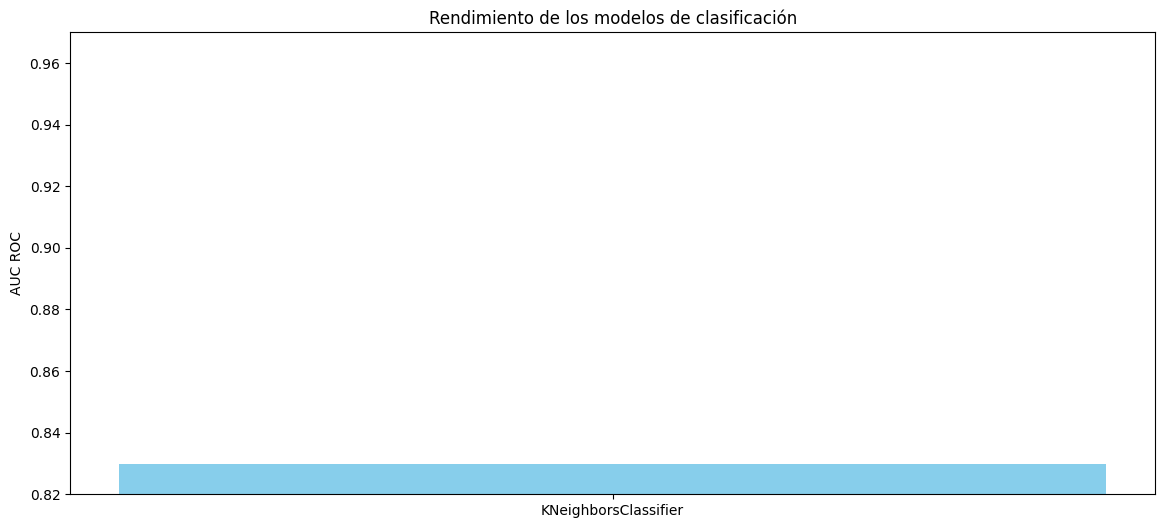

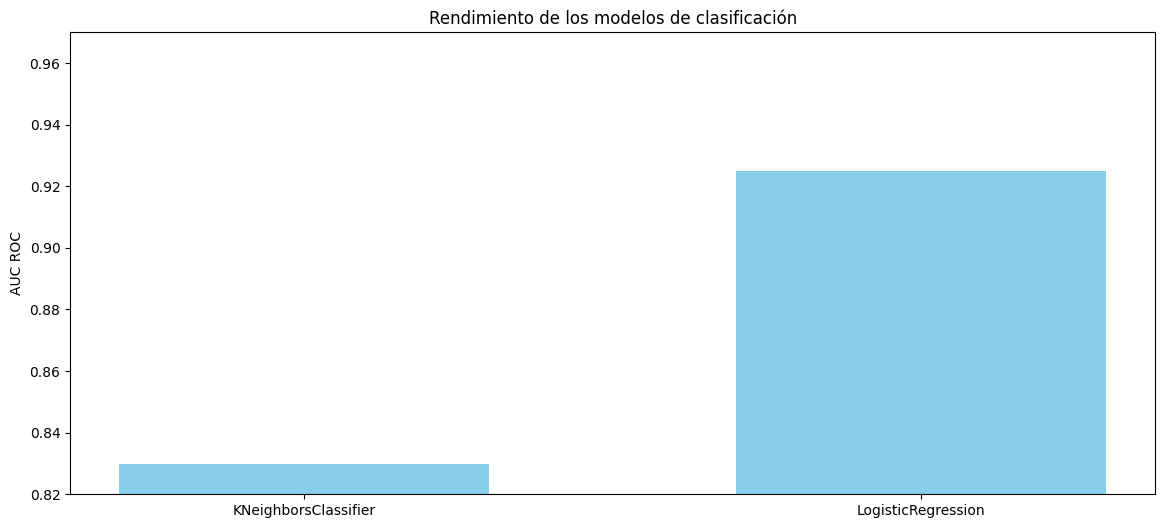

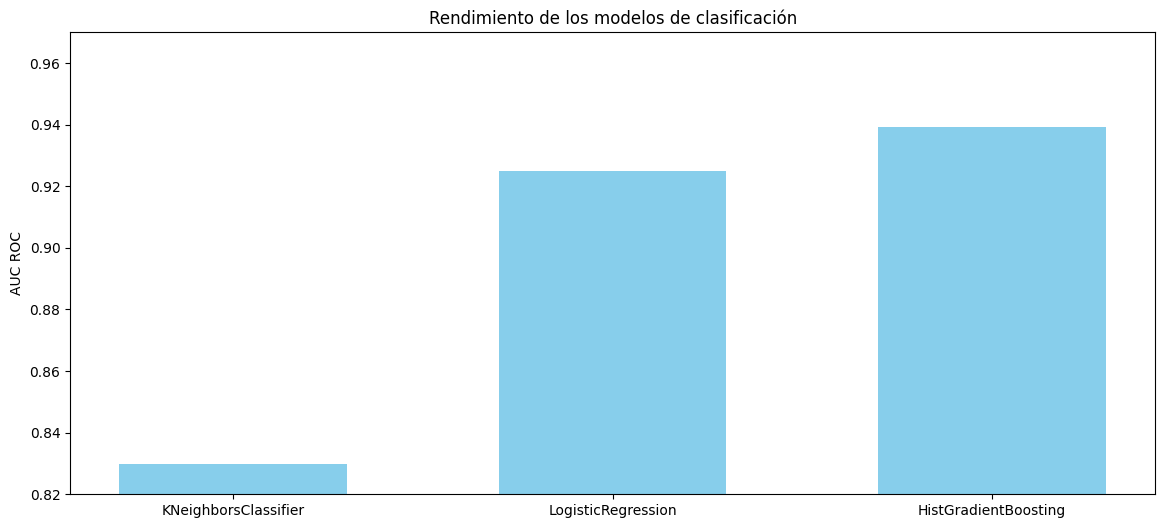

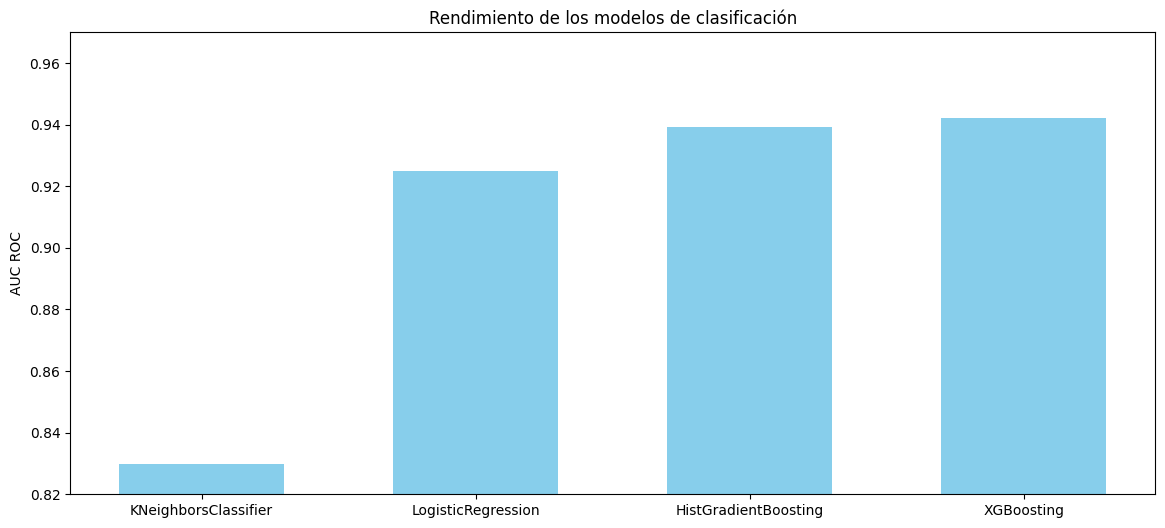

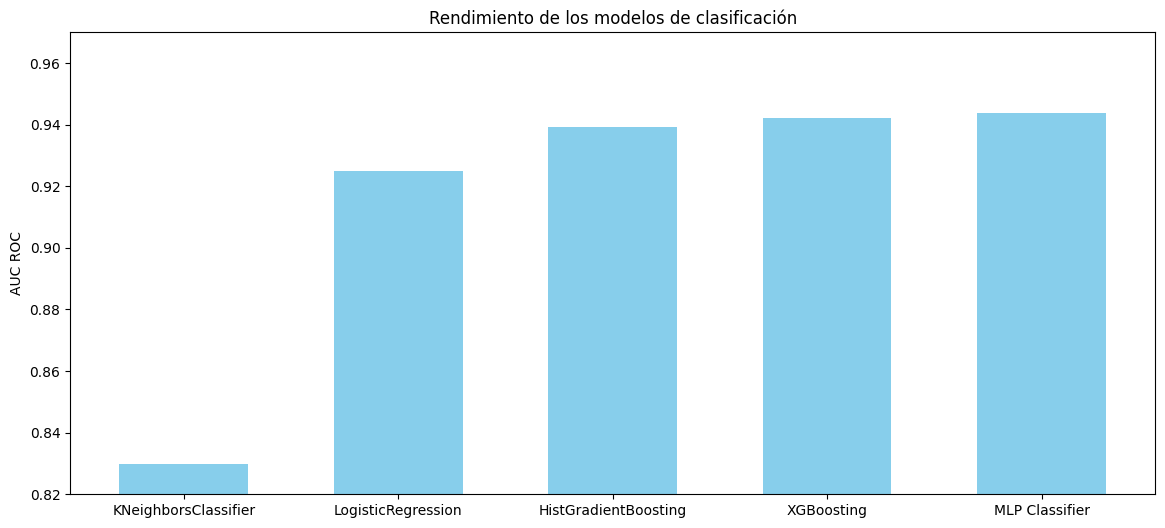

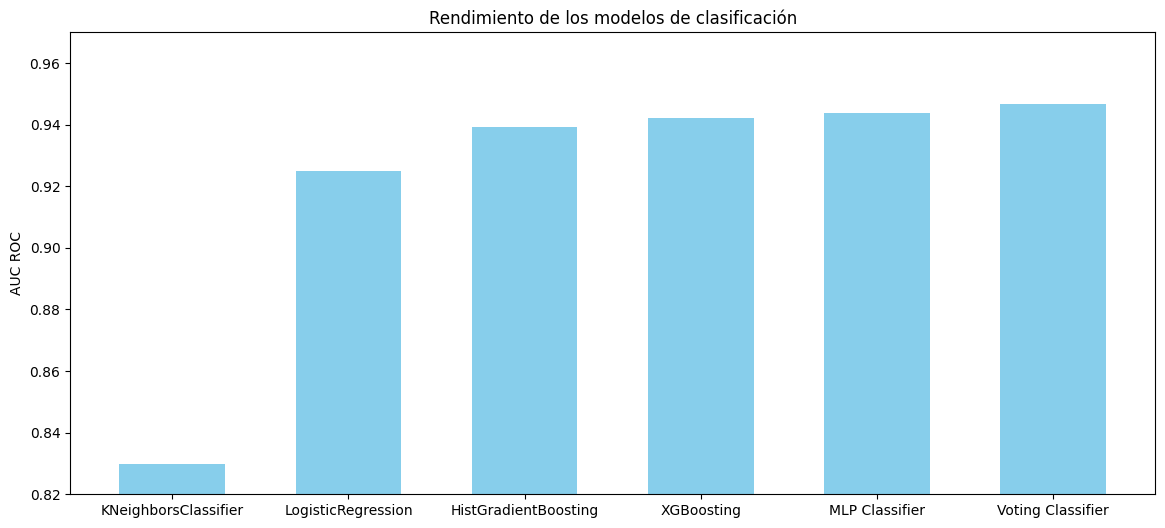

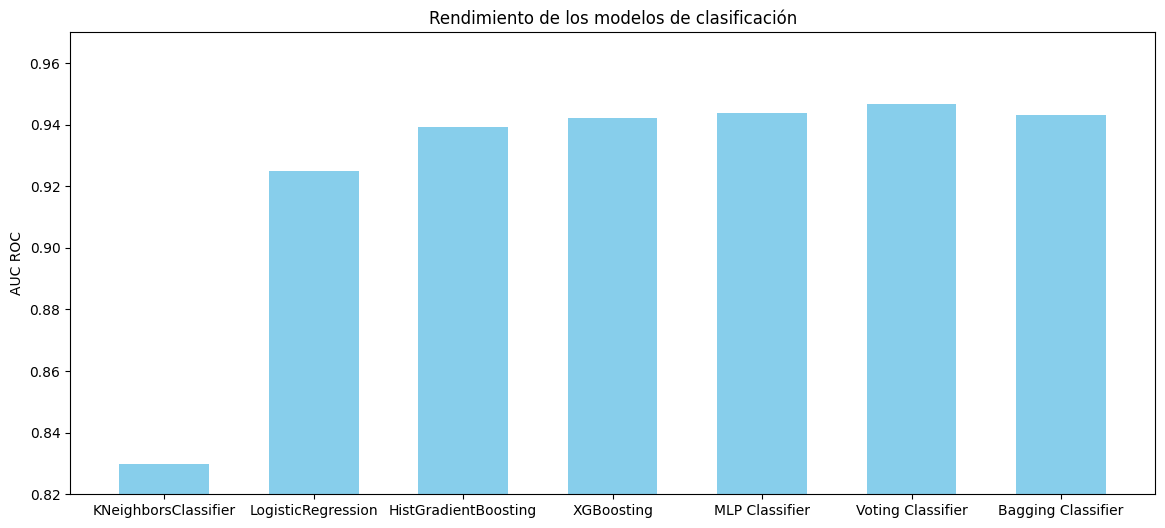

In [ ]:
# Lista de resultados de los modelos (AUC ROC)
resultados = [0.8297376836669855, 0.9248945731622107, 0.9392042107424967, 0.9421992825879335, 0.9438376256841549, 0.9466293522831414, 0.9432224749480973]  # ejemplo de rendimientos

# Lista de nombres de los modelos
nombres_modelos = ["KNeighborsClassifier", "LogisticRegression", "HistGradientBoosting", "XGBoosting", "MLP Classifier", "Voting Classifier", "Bagging Classifier"]

# Bucle para ir añadiendo modelos progresivamente
for i in range(1, len(nombres_modelos) + 1):
    # Crear la figura y los ejes
    plt.figure(figsize=(14, 6))
    plt.ylim(0.82, 0.97)  # Limitar el rango del eje Y para que no se escale automáticamente

    # Dibujar el histograma con los modelos acumulados
    plt.bar(nombres_modelos[:i], resultados[:i], color='skyblue', width=0.6)

    # Añadir etiquetas y título
    plt.ylabel('AUC ROC')
    plt.title('Rendimiento de los modelos de clasificación')

    # Mostrar el gráfico
    plt.show()
